In [13]:
import sklearn
import tensorflow as tf
import numpy as np


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [17]:
import pandas as pd

In [19]:
data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv')

In [21]:
from sklearn.linear_model import Perceptron

In [27]:
# Step 3: Prepare the features and target
# Assuming 'loyalty' is the target column and rest are features
X = data.drop(columns=['Loyalty'])  # Features (drop the target column)
y = data['Loyalty']  # Target: loyalty column

In [29]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## The perceptron is a type of linear classifier that uses a step function to decide class membership.

In [31]:
# Step 4: Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Initialize and train the Perceptron model
model = Perceptron(max_iter=1000, random_state=42) #creates a perceptron object #max_iter=1000: Sets the maximum number of iterations the model can run for training and random_state=42: Ensures reproducibility by fixing the randomness during model initialization..
random_state=42: Ensures reproducibility by fixing the randomness during model initialization.
model.fit(X_train, y_train)

Perceptron(random_state=42)

In [37]:
# Step 5: Initialize and train the Perceptron model with specific parameters
model = Perceptron(
    eta0=1,                      # Initial learning rate
    penalty=None,                 # No regularization
    max_iter=1000,                # Maximum number of iterations
    random_state=42               # For reproducibility
)
model.fit(X_train, y_train)

Perceptron(eta0=1, random_state=42)

In [39]:
# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

In [43]:
# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")  

# Optionally, print some predictions for inspection
print("Predictions:", y_pred)

Model accuracy: 62.88%
Predictions: [3 3 3 ... 3 3 4]


In [45]:
print(y.unique())  # This will show the unique values in the loyalty column


[1 4 3 2]


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### The confusion matrix provides detailed insights into:
Correct classifications (diagonal values). Misclassifications (off-diagonal values). This helps evaluate the model's performance and identify where it struggles.

Rows represent the true classes. Columns represent the predicted classes.

In [51]:
# Confusion matrix (shows how many instances of each class are predicted correctly)
cm = confusion_matrix(y_test, y_pred)#y_test: The true labels from the test dataset,y_pred: The predicted labels from the model
print("Confusion Matrix:\n", cm) #confusion_matrix: A function that calculates how many instances are correctly or incorrectly classified for each class.

Confusion Matrix:
 [[  605   297  3255   516]
 [   15   270   352   397]
 [  108   200 14857   882]
 [  144   511  6640  6822]]


## Key Observations:

The model struggles to differentiate Class 3 and Class 4 due to high misclassification rates between these two classes.
Class 2 has fewer correct predictions (270) and many misclassifications, suggesting it is challenging for the model to classify accurately.

In [53]:
# Classification report (precision, recall, f1-score for each class)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.13      0.22      4673
           2       0.21      0.26      0.23      1034
           3       0.59      0.93      0.72     16047
           4       0.79      0.48      0.60     14117

    accuracy                           0.63     35871
   macro avg       0.57      0.45      0.44     35871
weighted avg       0.67      0.63      0.59     35871



## Metrics per Class:
Precision: Measures how many predicted instances of a class are actually correct.

High for Class 4 (0.79) but low for Class 2 (0.21).
Indicates Class 2 has significant false positives.
Recall: Measures how many actual instances of a class are correctly predicted.

High for Class 3 (0.93), meaning the model correctly identifies most instances of Class 3.
Very low for Class 1 (0.13), meaning most instances of Class 1 are misclassified.
F1-Score: A balanced measure of precision and recall.

Best for Class 3 (0.72) but poor for Class 1 (0.22) and Class 2 (0.23).
Support: The number of actual instances for each class.

Class 3 and Class 4 dominate the dataset, potentially influencing the model's focus on these classes.

### The model performs best for Class 3 but struggles with Class 1 and Class 2 due to low recall and f1-scores.
Class imbalance (large differences in support values) likely contributes to poor performance on smaller classes.

Improvements could involve addressing class imbalance (e.g., oversampling/undersampling) or modifying the architecture/hyperparameters to balance precision and recall across classes.



In [55]:
# Step 5: Initialize and train the Perceptron model with class weights
from sklearn.linear_model import Perceptron

# Define the Perceptron model with balanced class weights
model = Perceptron(
    eta0=1,                     # Initial learning rate
    penalty=None,               # No regularization
    max_iter=1000,               # Maximum number of iterations
    random_state=42,             # For reproducibility
    class_weight='balanced'      # Automatically adjusts weights inversely proportional to class frequencies in the data, addressing class imbalance.
)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = (y_pred == y_test).mean()
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model accuracy: 59.65%
Confusion Matrix:
 [[  697  1644  1053  1279]
 [   11   926    23    74]
 [  167  3355  9222  3303]
 [  150  2666   748 10553]]
Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.15      0.24      4673
           2       0.11      0.90      0.19      1034
           3       0.83      0.57      0.68     16047
           4       0.69      0.75      0.72     14117

    accuracy                           0.60     35871
   macro avg       0.58      0.59      0.46     35871
weighted avg       0.74      0.60      0.63     35871



### Conclusion
Class Imbalance Impact:

Class 2 has very low precision but high recall, meaning the model predicts most of Class 2 correctly but also falsely predicts many others as Class 2.
Class 3 and 4 dominate the performance, leading to better weighted average metrics.
Performance Insights:

Precision and recall for Class 1 and Class 2 are low, suggesting difficulty distinguishing these classes.
Overall accuracy (59.65%) and strong performance on larger classes (3 and 4) suggest room for improvement in handling smaller classes.

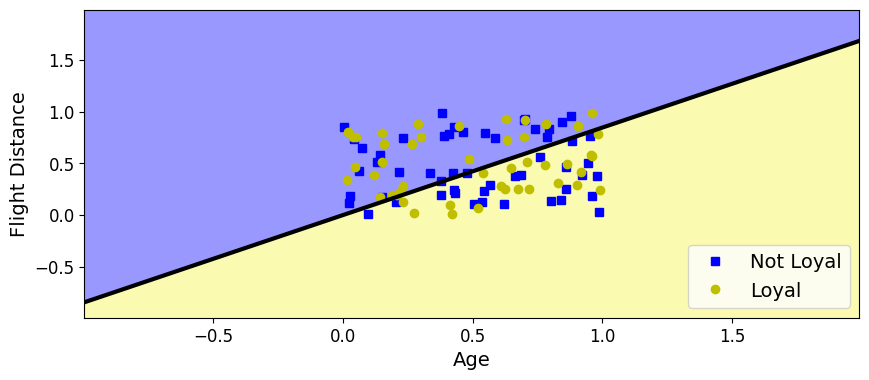

Accuracy on test set: 45.00%


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Assuming X has 21 features and y is the target variable 'Loyalty' (e.g., 0 for not loyal, 1 for loyal)

X = np.random.rand(100, 21)  # Example data with 21 features 
y = np.random.randint(0, 2, size=100)  # Example binary target

# Step 1: Select two features for visualization (e.g., 'Age' and 'Flight Distance')
# You can choose any two features here (indices for Age and Flight Distance are just for illustration)
selected_features = [1, 4]  # 'Age' and 'Flight Distance' 
X_selected = X[:, selected_features]

# Step 2: Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Perceptron model
per_clf = Perceptron()
per_clf.fit(X_train, y_train)

# Step 5: Coefficients for the decision boundary equation (for 2D)
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

# Step 6: Define the plotting range (axes for visualization)
axes = [X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1, X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1]

# Step 7: Create a mesh grid for visualization
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

# Step 8: Predict using the trained Perceptron model
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

# Step 9: Plot the decision boundary and data points
plt.figure(figsize=(10, 4))

# Scatter plot of the points, assuming class 0 and class 1 for Loyalty
plt.plot(X_selected[y == 0, 0], X_selected[y == 0, 1], "bs", label="Not Loyal")
plt.plot(X_selected[y == 1, 0], X_selected[y == 1, 1], "yo", label="Loyal")

# Plot the decision boundary line
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

# Create a custom colormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

# Contour plot of decision regions
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Age", fontsize=14)  # Replace with the correct feature name
plt.ylabel("Flight Distance", fontsize=14)  # Replace with the correct feature name
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

# Evaluate the model accuracy on the test set
y_pred = per_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


### Observations:
Low Accuracy: The accuracy of 45% suggests that the Perceptron is performing close to random guessing. This could be due to:

Non-linear separability of the data (Perceptron is a linear classifier).
Poor choice of features (Age and Flight Distance) which may not carry significant discriminatory information for the target.
Small dataset size (100 samples) and potential class imbalance.

## With top 10 features

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import Perceptron

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

# Feature columns and ranks (as per your data)
feature_columns = [
    "Type of Travel", "Online Boarding", "In-flight Wifi Service", "Ease of Online Booking", "Age", 
    "In-flight Entertainment", "Flight Distance", "Departure and Arrival Time Convenience", 
    "Seat Comfort", "Class", "Cleanliness", "On-board Service", "Leg Room Service", "In-flight Service", 
    "Gate Location", "Baggage Handling", "Check-in Service", "Food and Drink", "Gender", "Arrival Delay", "Departure Delay"
]

# Corresponding ranks of the features (lower rank means higher priority)
feature_ranks = [
    3, 4, 7, 9, 5, 9, 5, 10, 10, 10, 13, 12, 13, 15, 17, 16, 16, 17, 16, 16, 16
]

# Create a DataFrame of feature names and their ranks
feature_rank_df = pd.DataFrame({
    "Feature": feature_columns,
    "Rank": feature_ranks
})

# Sort the features by their rank (ascending order - lower rank is better)
sorted_features = feature_rank_df.sort_values(by="Rank").reset_index(drop=True)

# Select top 10 features based on the ranking (highest priority)
top_10_features = sorted_features['Feature'].head(10).tolist()

# Extract the selected top 10 features from the DataFrame
X = df[top_10_features].values

# The target variable (Loyalty)
y = df['Loyalty'].values

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Perceptron model with class weights
model = Perceptron(
    eta0=1,                     # Initial learning rate
    penalty=None,               # No regularization
    max_iter=1000,              # Maximum number of iterations
    random_state=42,            # For reproducibility
    class_weight='balanced'     # Automatically adjusts weights inversely proportional to class frequencies
)

# Step 4: Train the Perceptron model
model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = (y_pred == y_test).mean()  # Calculate accuracy
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Step 7: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Step 8: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Model accuracy: 57.05%
Confusion Matrix:
 [[2020  704  104  278]
 [  37  640    5   14]
 [1753  620 6443 1892]
 [ 935 3516  412 4541]]
Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.65      0.51      3106
           2       0.12      0.92      0.21       696
           3       0.93      0.60      0.73     10708
           4       0.68      0.48      0.56      9404

    accuracy                           0.57     23914
   macro avg       0.54      0.66      0.50     23914
weighted avg       0.74      0.57      0.62     23914



## one versus rest perceptron for multi class

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

# Feature columns and ranks (as per your data)
feature_columns = [
    "Type of Travel", "Online Boarding", "In-flight Wifi Service", "Ease of Online Booking", "Age", 
    "In-flight Entertainment", "Flight Distance", "Departure and Arrival Time Convenience", 
    "Seat Comfort", "Class", "Cleanliness", "On-board Service", "Leg Room Service", "In-flight Service", 
    "Gate Location", "Baggage Handling", "Check-in Service", "Food and Drink", "Gender", "Arrival Delay", "Departure Delay"
]

# Corresponding ranks of the features (lower rank means higher priority)
feature_ranks = [
    3, 4, 7, 9, 5, 9, 5, 10, 10, 10, 13, 12, 13, 15, 17, 16, 16, 17, 16, 16, 16
]

# Create a DataFrame of feature names and their ranks
feature_rank_df = pd.DataFrame({
    "Feature": feature_columns,
    "Rank": feature_ranks
})

# Sort the features by their rank (ascending order - lower rank is better)
sorted_features = feature_rank_df.sort_values(by="Rank").reset_index(drop=True)

# Select top 10 features based on the ranking (highest priority)
top_10_features = sorted_features['Feature'].head(10).tolist()

# Extract the selected top 10 features from the DataFrame
X = df[top_10_features].values

# The target variable (Loyalty)
y = df['Loyalty'].values

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Initialize OneVsRestClassifier with Perceptron
model = OneVsRestClassifier(Perceptron(
    eta0=1,                     # Initial learning rate
    penalty=None,               # No regularization
    max_iter=1000,              # Maximum number of iterations
    random_state=42,            # For reproducibility
    class_weight='balanced'     # Automatically adjusts weights inversely proportional to class frequencies
))

# Step 4: Train the One-vs-All Perceptron model
model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = (y_pred == y_test).mean()  # Calculate accuracy
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Step 7: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Step 8: Classification report with zero_division parameter to handle warnings
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


Model accuracy: 59.03%
Confusion Matrix:
 [[1943  644  317  202]
 [  36  608   15   37]
 [1180  496 7868 1164]
 [ 993 4064  650 3697]]
Classification Report:
              precision    recall  f1-score   support

           1       0.47      0.63      0.54      3106
           2       0.10      0.87      0.19       696
           3       0.89      0.73      0.80     10708
           4       0.72      0.39      0.51      9404

    accuracy                           0.59     23914
   macro avg       0.55      0.66      0.51     23914
weighted avg       0.75      0.59      0.64     23914



### Observations:
Overall Performance: The One-vs-Rest Perceptron model shows a slight improvement in accuracy, with better handling of the class imbalance, particularly for classes 1 and 4. However, class 2 still has an imbalance issue, as indicated by the low precision and F1-score despite a high recall.

Precision/Recall Trade-off: The One-vs-Rest model improved recall for class 3 (from 0.60 to 0.73) and class 4 (from 0.48 to 0.39). However, precision for class 2 remains quite low. This highlights the difficulty in achieving a balanced precision-recall for all classes in a multi-class classification problem.

## PERCPETRON DECISION BOUNDARY FOR 2 CLASSES LOYAL AND NON LOYAL WITH TOP 10 FEATURES

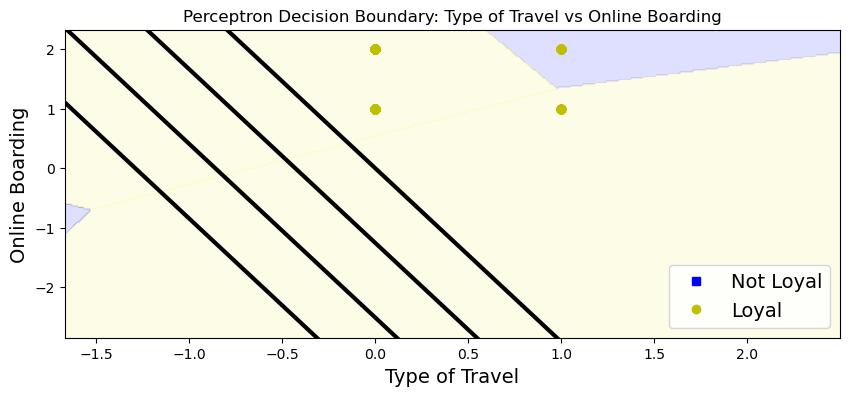

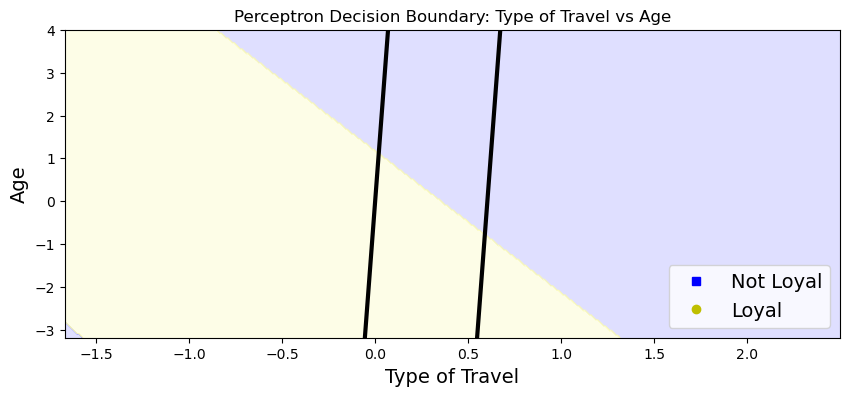

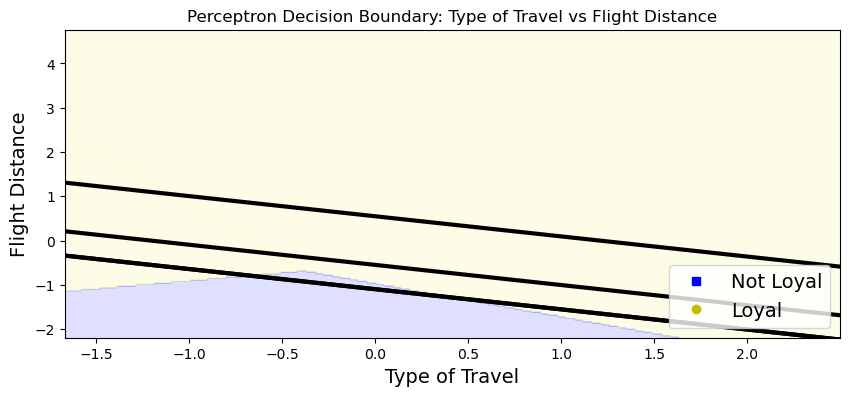

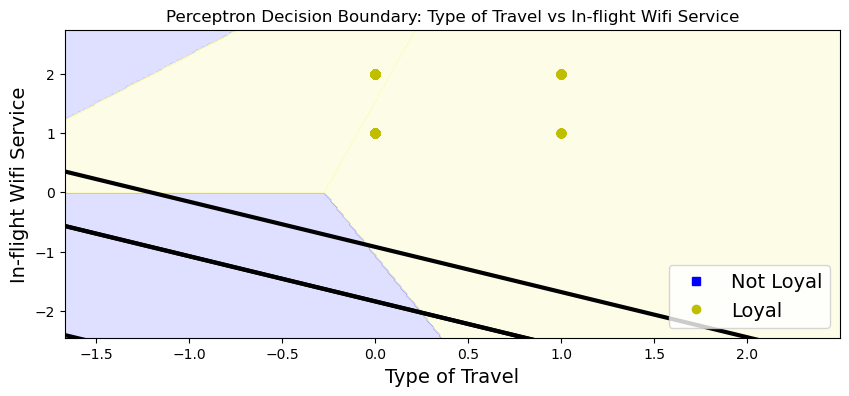

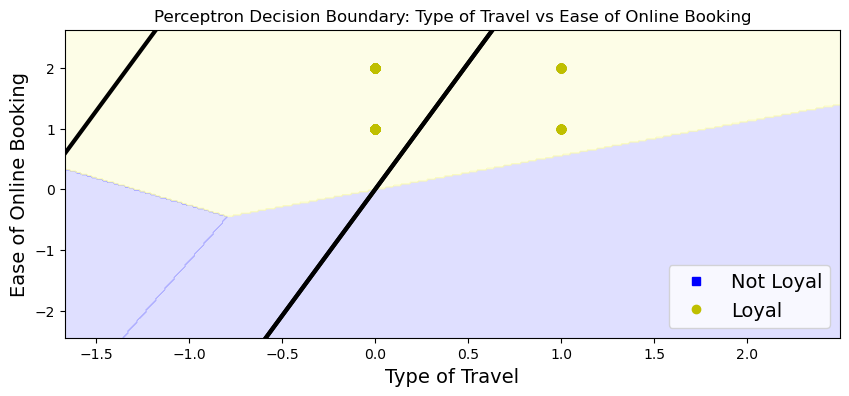

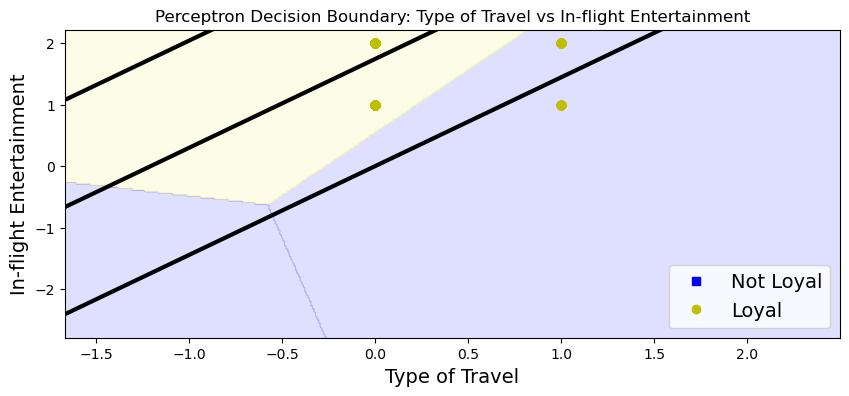

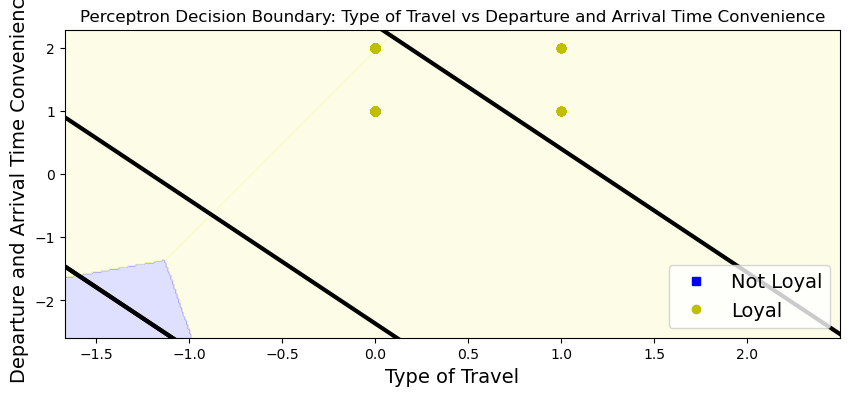

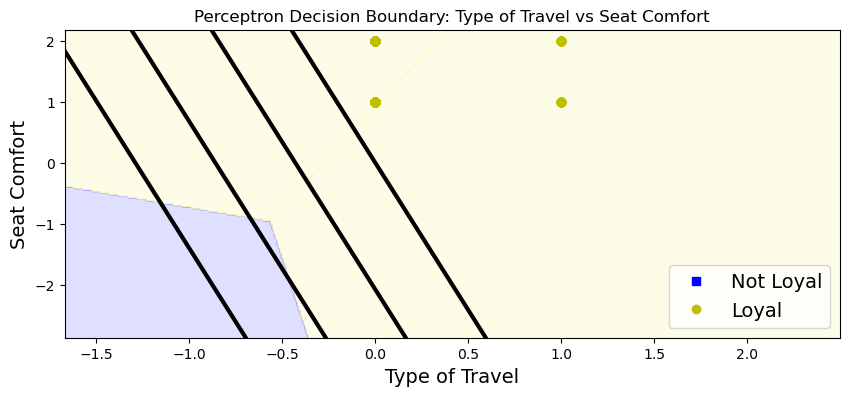

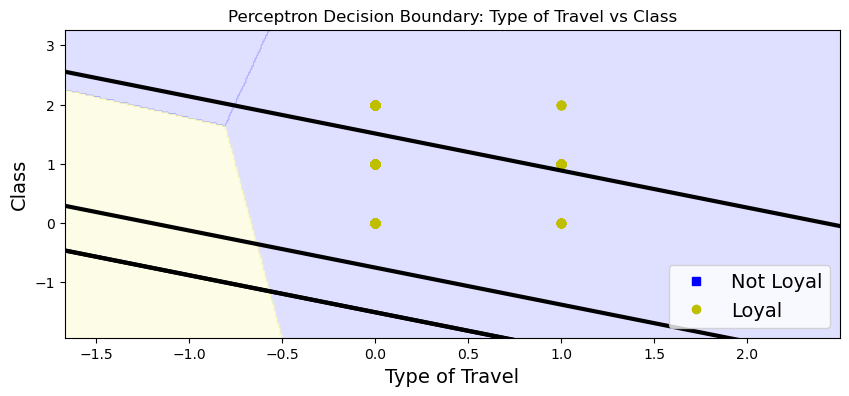

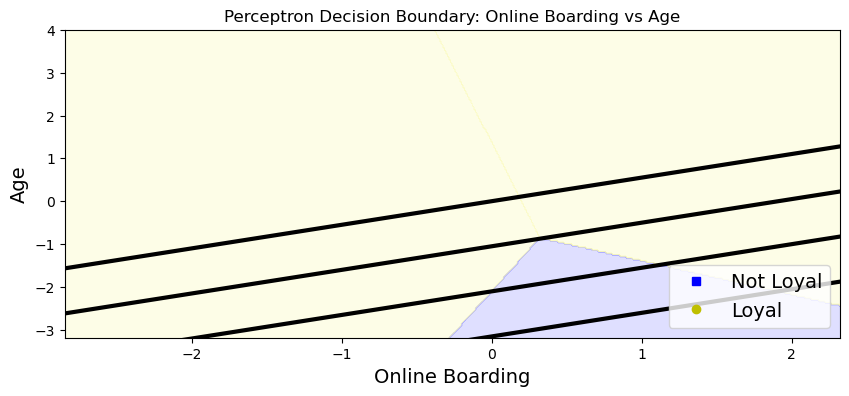

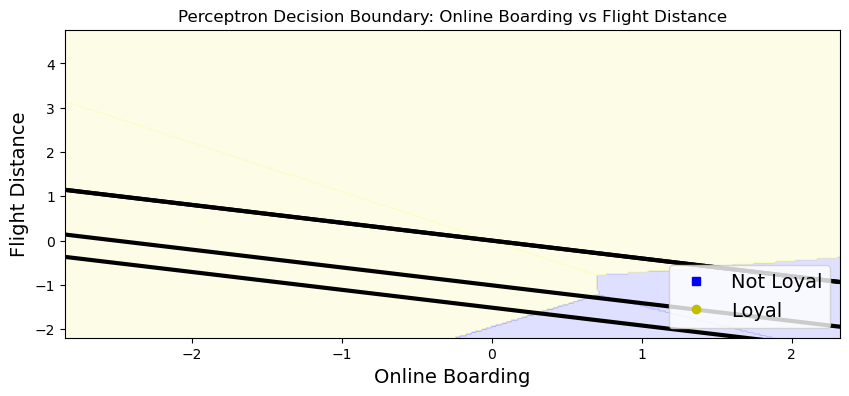

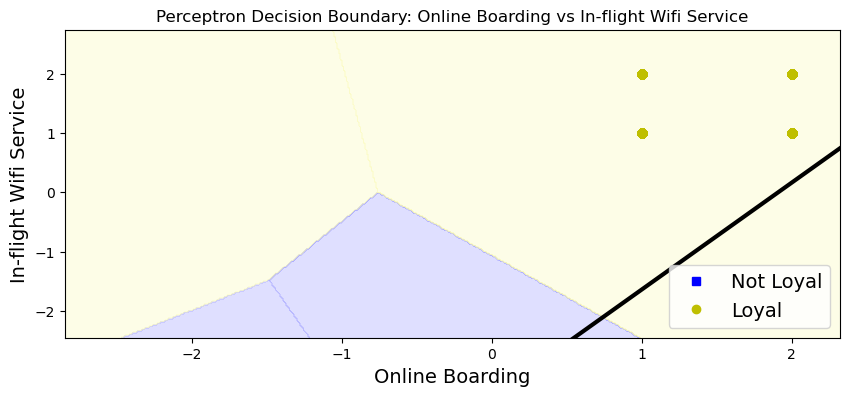

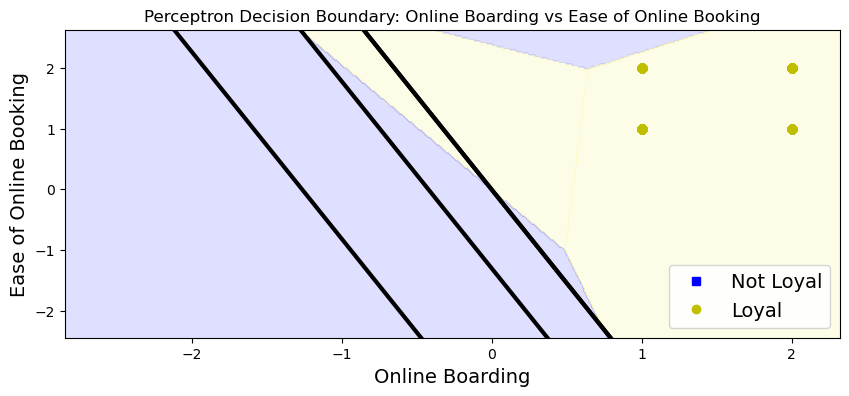

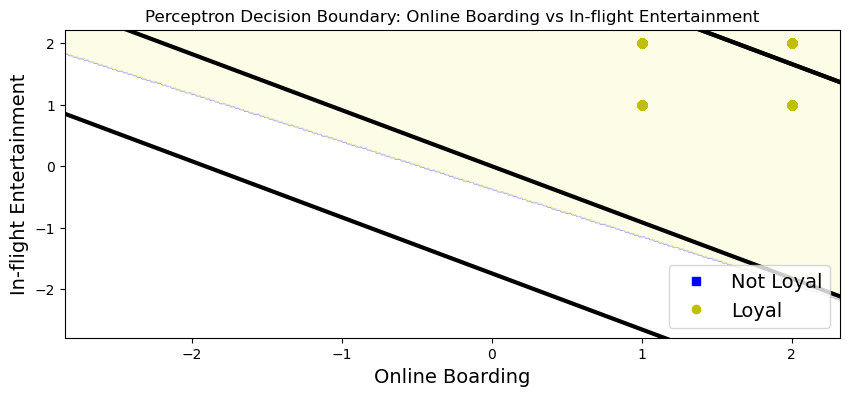

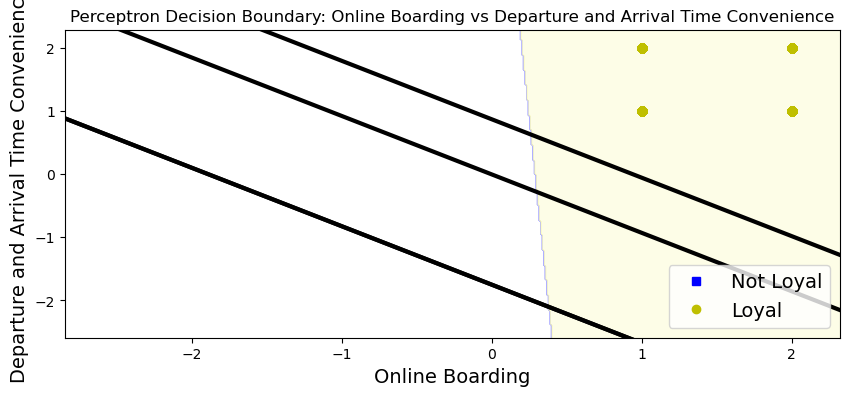

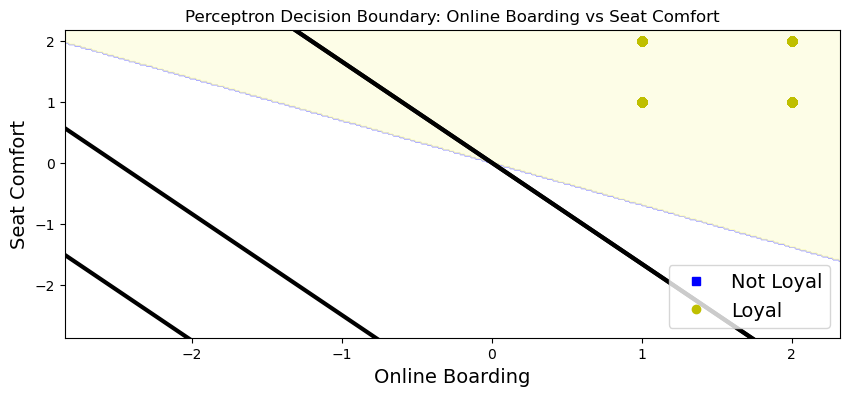

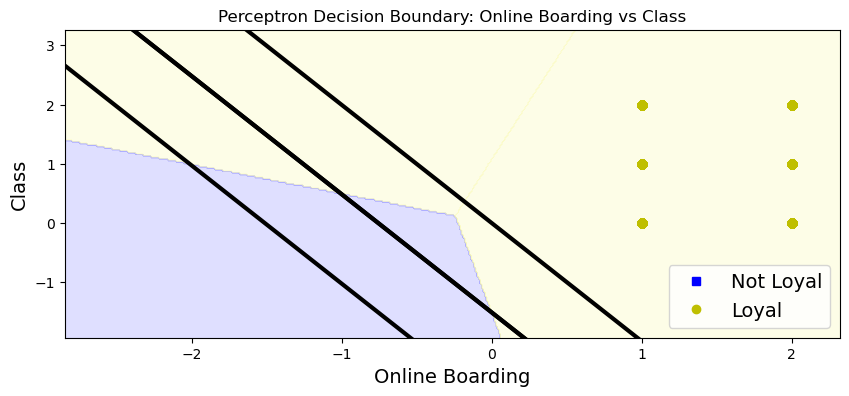

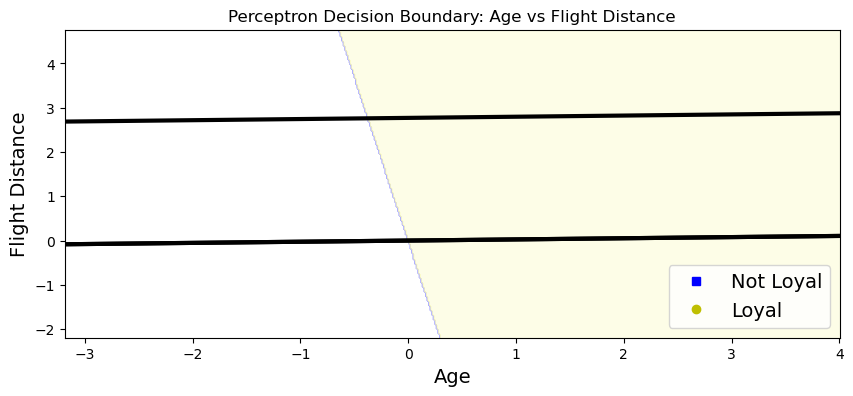

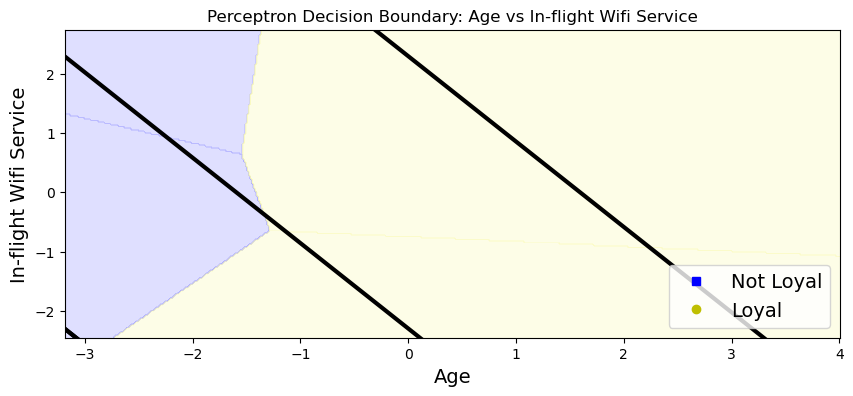

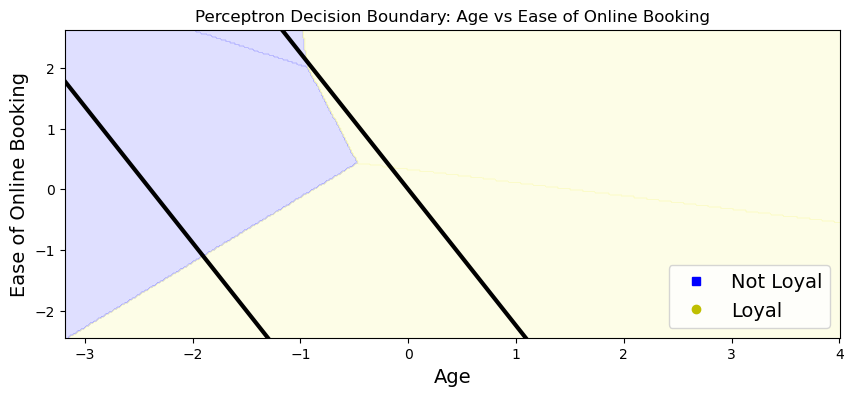

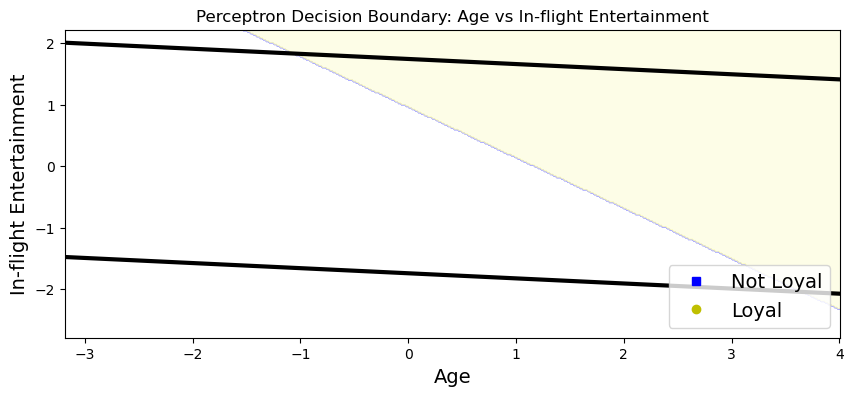

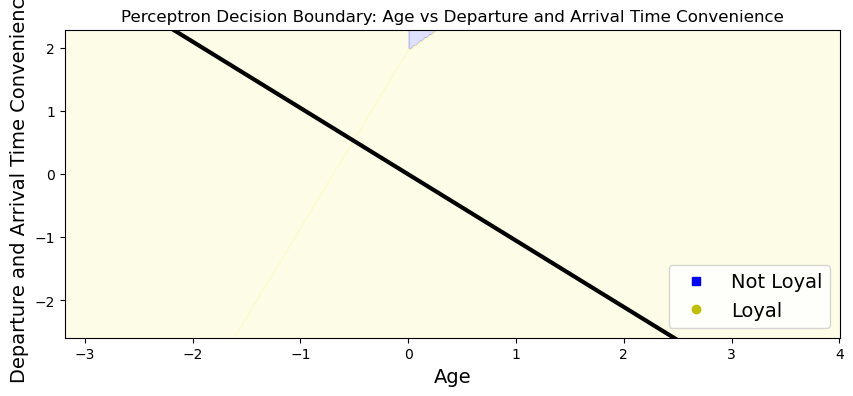

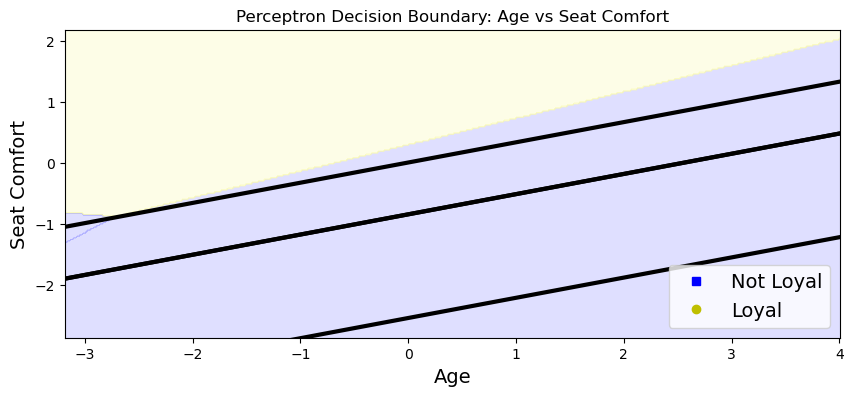

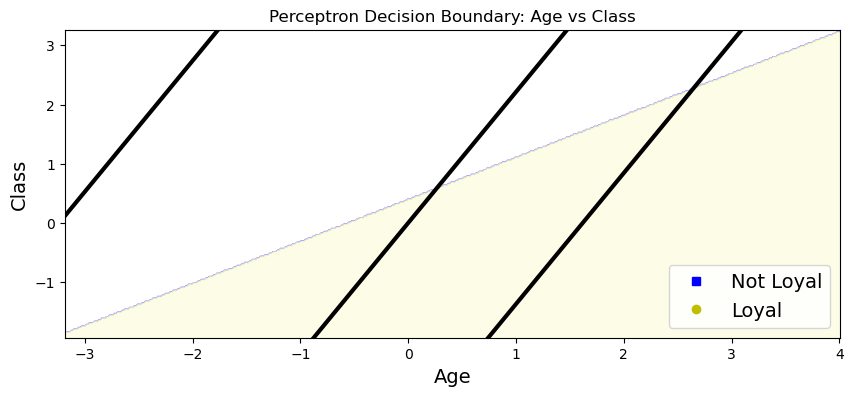

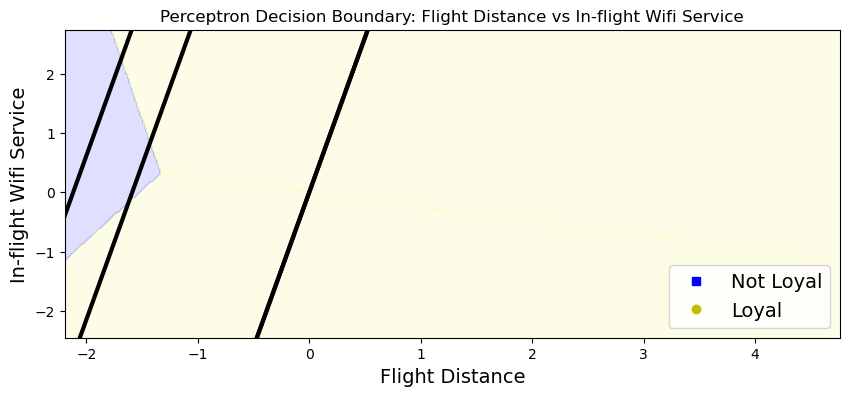

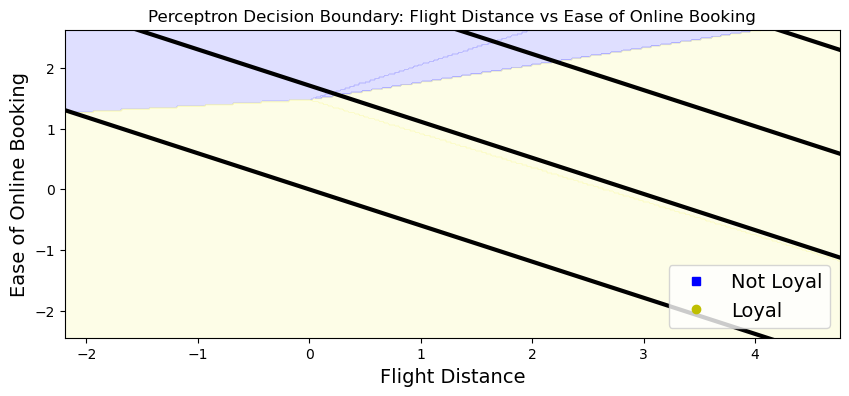

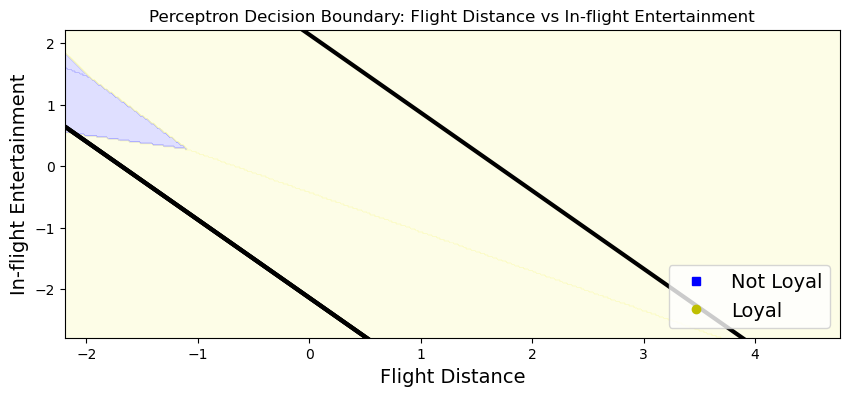

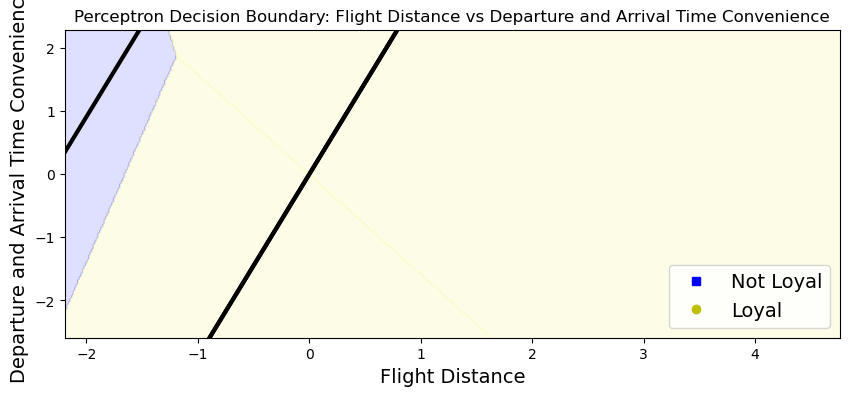

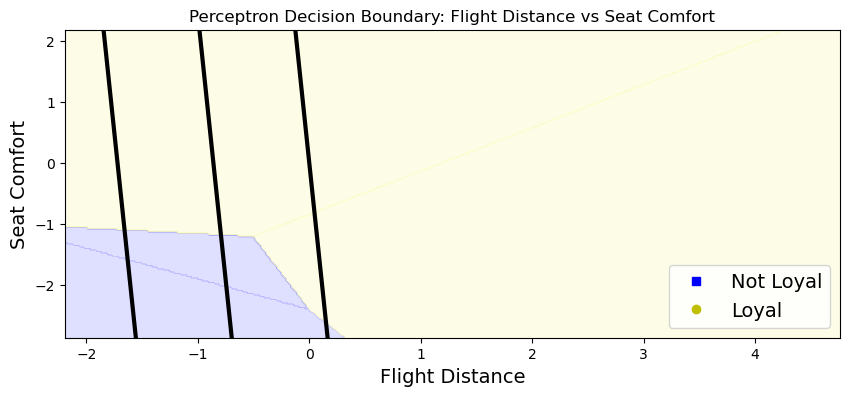

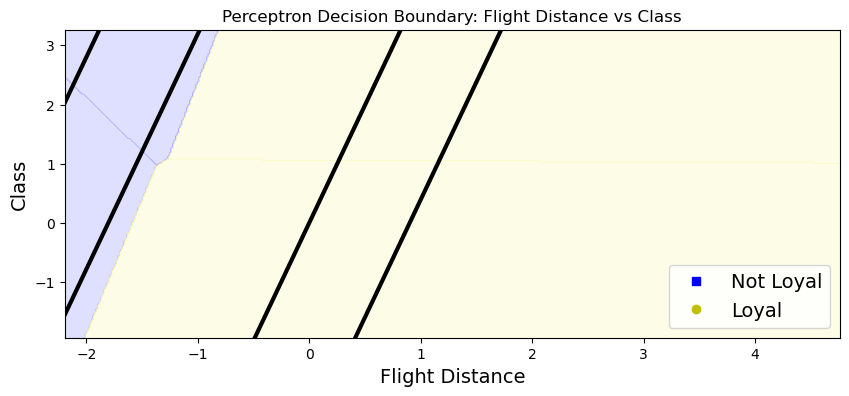

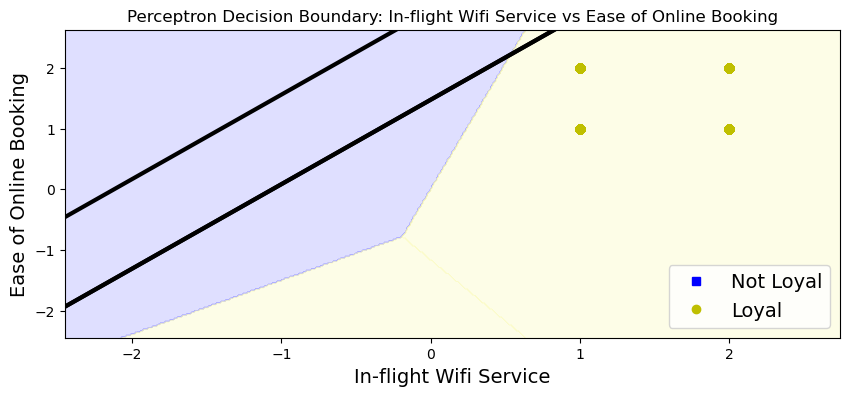

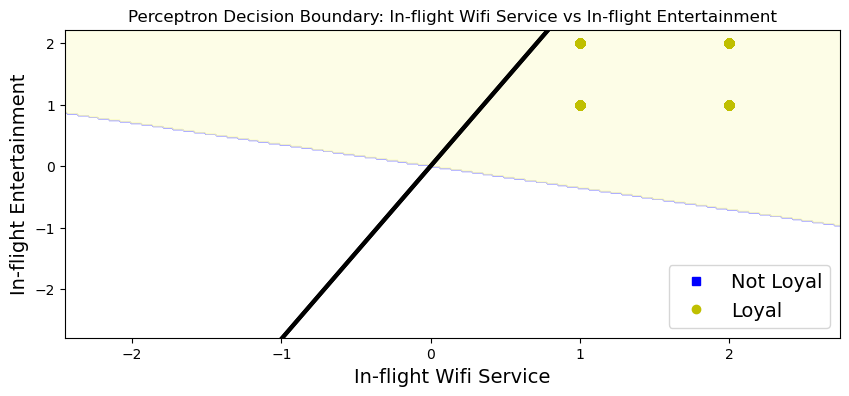

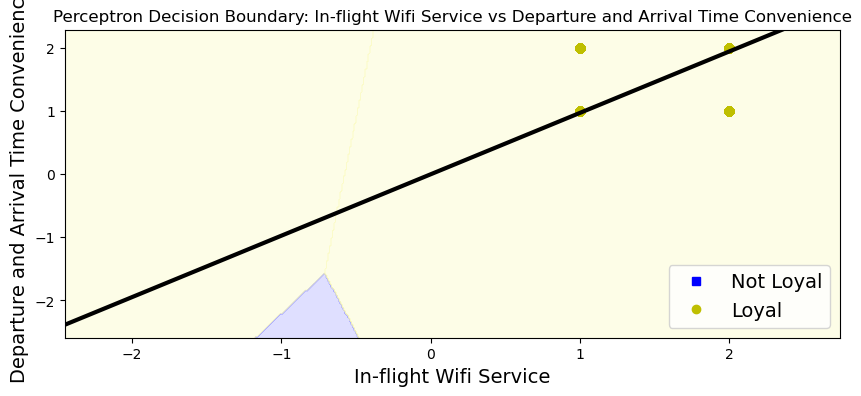

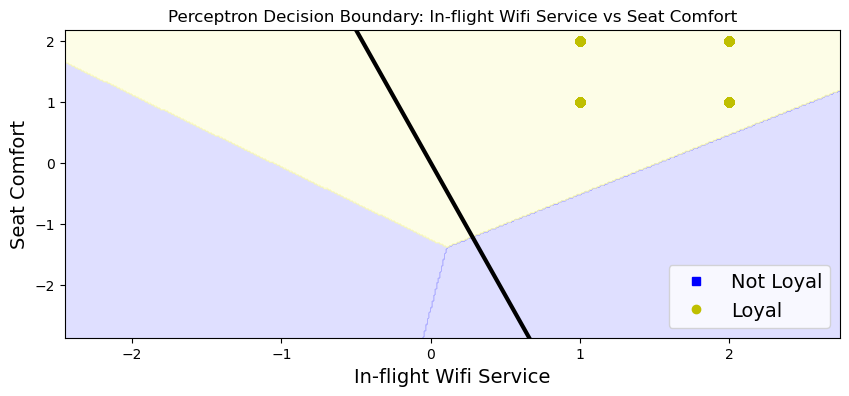

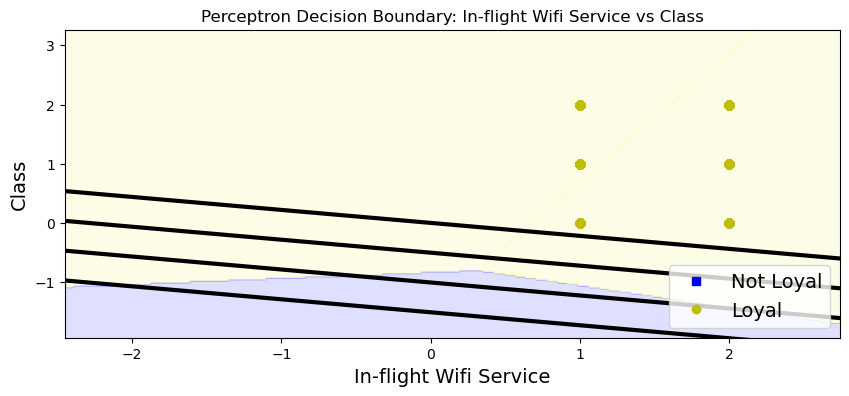

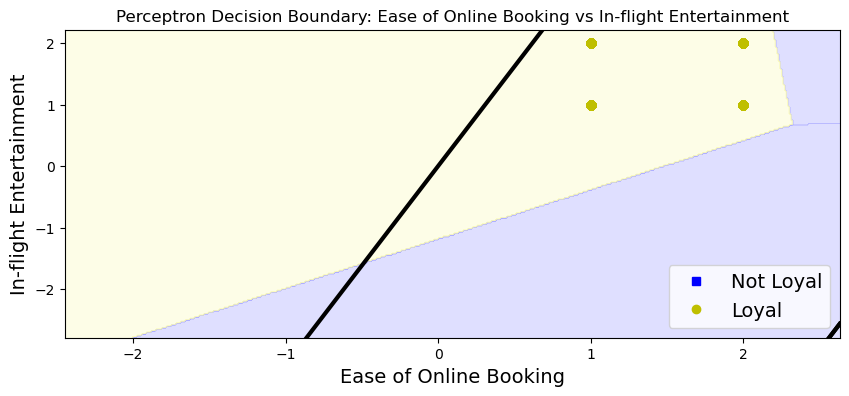

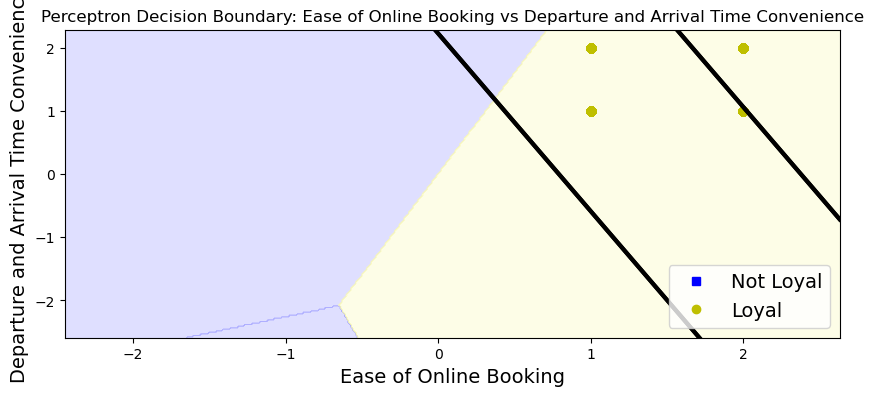

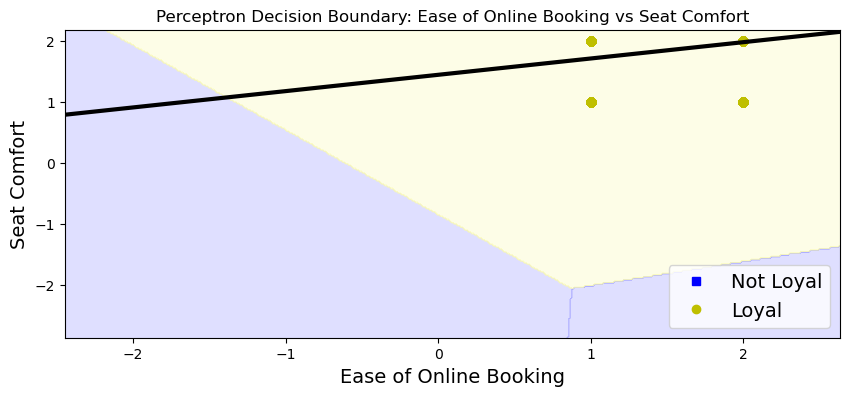

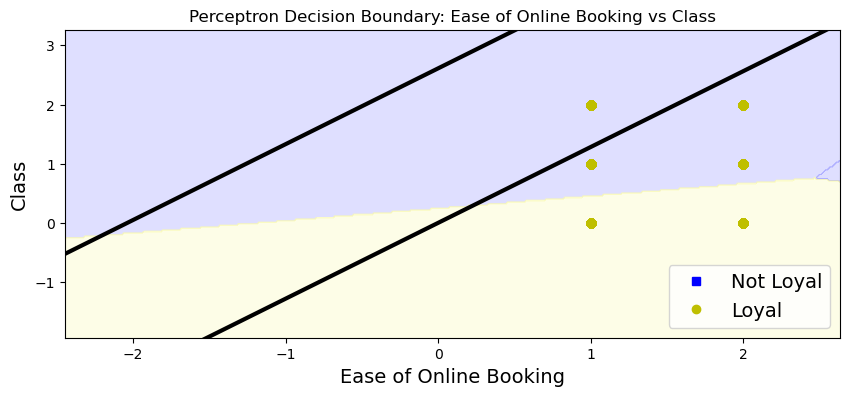

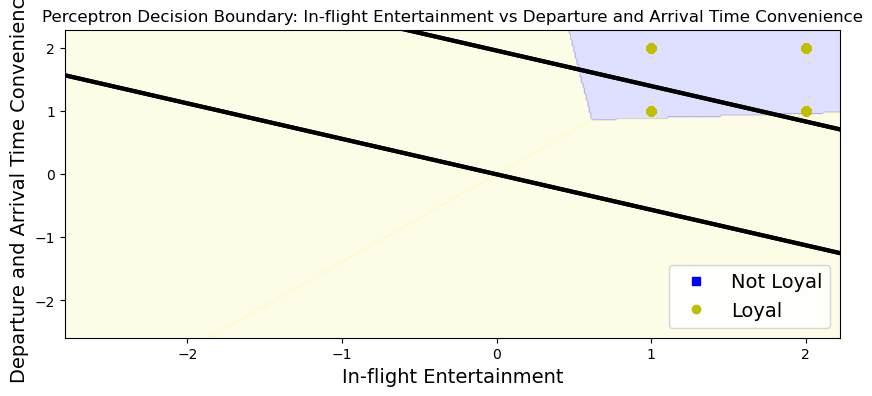

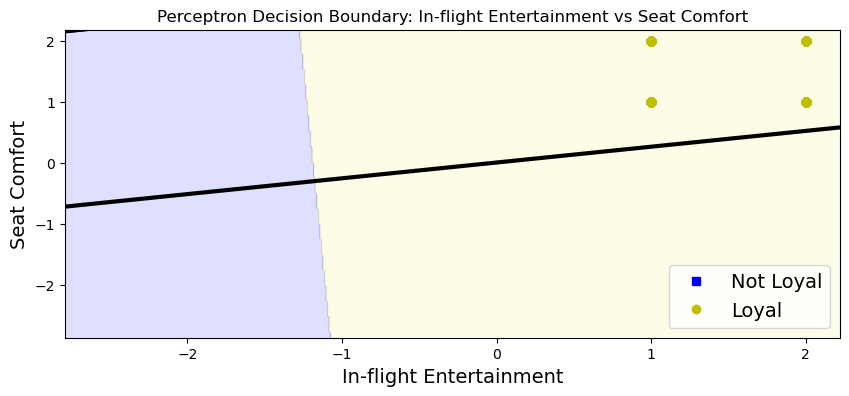

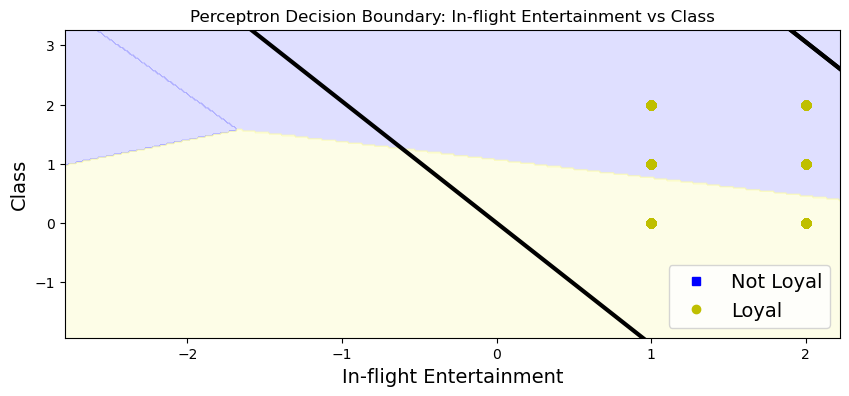

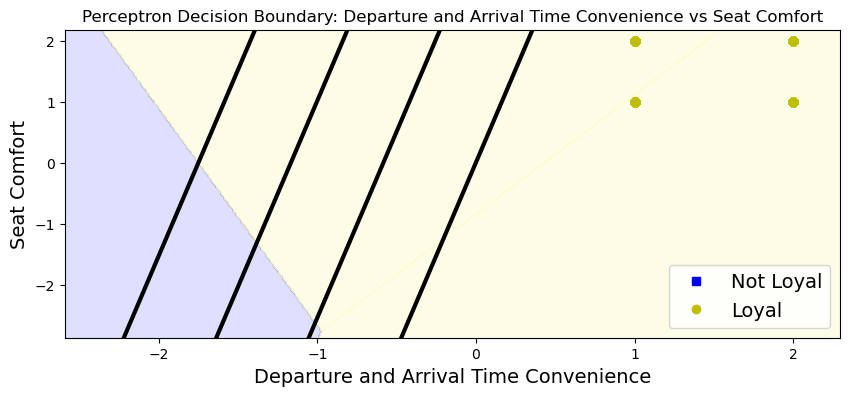

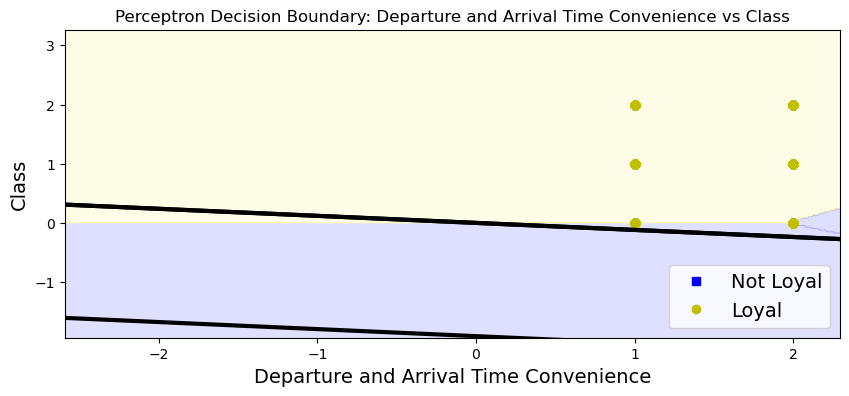

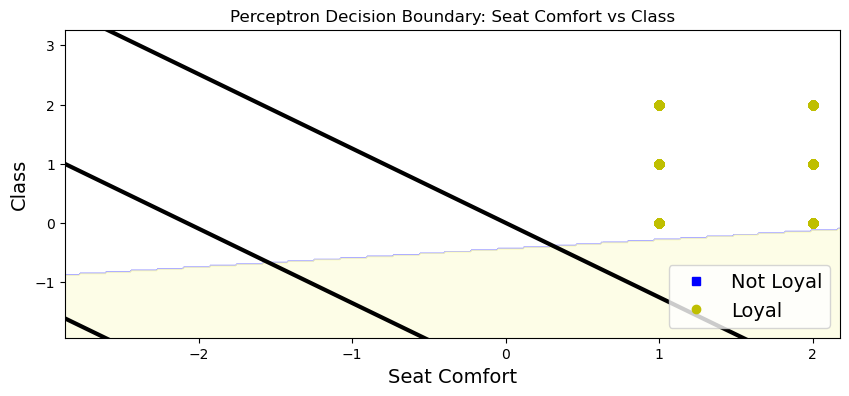

                                 Feature 1  \
0                           Type of Travel   
1                           Type of Travel   
2                           Type of Travel   
3                           Type of Travel   
4                           Type of Travel   
5                           Type of Travel   
6                           Type of Travel   
7                           Type of Travel   
8                           Type of Travel   
9                          Online Boarding   
10                         Online Boarding   
11                         Online Boarding   
12                         Online Boarding   
13                         Online Boarding   
14                         Online Boarding   
15                         Online Boarding   
16                         Online Boarding   
17                                     Age   
18                                     Age   
19                                     Age   
20                                

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Assuming you have the dataset in a pandas DataFrame called df
df = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

# List of feature names
feature_columns = [
    "Type of Travel", "Online Boarding", "In-flight Wifi Service", "Ease of Online Booking", "Age", 
    "In-flight Entertainment", "Flight Distance", "Departure and Arrival Time Convenience", 
    "Seat Comfort", "Class", "Cleanliness", "On-board Service", "Leg Room Service", "In-flight Service", 
    "Gate Location", "Baggage Handling", "Check-in Service", "Food and Drink", "Gender", "Arrival Delay", "Departure Delay"
]

# Corresponding ranks of the features (lower rank means higher priority)
feature_ranks = [
    3, 4, 7, 9, 5, 9, 5, 10, 10, 10, 13, 12, 13, 15, 17, 16, 16, 17, 16, 16, 16
]

# Create a DataFrame of feature names and their ranks
feature_rank_df = pd.DataFrame({
    "Feature": feature_columns,
    "Rank": feature_ranks
})

# Sort the features by their rank (ascending order - lower rank is better)
sorted_features = feature_rank_df.sort_values(by="Rank").reset_index(drop=True)

# Select top 10 features based on the ranking (highest priority)
top_10_features = sorted_features['Feature'].head(10).tolist()

# Extract the selected top 10 features from the DataFrame
X = df[top_10_features].values

# The target variable (Loyalty)
y = df['Loyalty'].values

# Feature names for plotting purposes
feature_names = top_10_features

# List to store the results of accuracies
accuracy_results = []

# Iterate over pairs of selected features
for i in range(len(top_10_features)):
    for j in range(i + 1, len(top_10_features)):
        feature_x = top_10_features[i]
        feature_y = top_10_features[j]

        # Extract the selected features
        X_selected = X[:, [i, j]]

        # Standardize the selected features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_selected)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Initialize and train the Perceptron model
        per_clf = Perceptron(random_state=42)
        per_clf.fit(X_train, y_train)

        # Calculate the coefficients for the decision boundary
        a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
        b = -per_clf.intercept_ / per_clf.coef_[0][1]

        # Define the plotting range
        axes = [X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1,
                X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1]

        # Create a mesh grid for visualization
        x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
        X_new = np.c_[x0.ravel(), x1.ravel()]

        # Predict using the trained Perceptron model
        y_predict = per_clf.predict(X_new)
        zz = y_predict.reshape(x0.shape)

        # Plot the decision boundary and data points
        plt.figure(figsize=(10, 4))

        # Scatter plot of the points
        plt.plot(X_selected[y == 0, 0], X_selected[y == 0, 1], "bs", label="Not Loyal")
        plt.plot(X_selected[y == 1, 0], X_selected[y == 1, 1], "yo", label="Loyal")

        # Plot the decision boundary line
        plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

        # Create a custom colormap
        custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

        # Contour plot of decision regions
        plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha=0.3)

        # Set plot labels
        plt.xlabel(feature_names[i], fontsize=14)
        plt.ylabel(feature_names[j], fontsize=14)
        plt.legend(loc="lower right", fontsize=14)
        plt.axis(axes)
        plt.title(f"Perceptron Decision Boundary: {feature_names[i]} vs {feature_names[j]}")
        plt.show()

        # Evaluate the model accuracy on the test set
        y_pred = per_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results.append([feature_names[i], feature_names[j], accuracy * 100])

# Create a DataFrame to display the results
accuracy_df = pd.DataFrame(accuracy_results, columns=["Feature 1", "Feature 2", "Accuracy (%)"])

# Display the results
print(accuracy_df)


### Loyal and non loyal
High-Accuracy Features: Features like "Type of Travel", "Online Boarding", and "Age" appear multiple times with high accuracy. These features seem to provide clear distinctions between  loyal and non-loyal customers, contributing significantly to the classification decision.

Lower-Accuracy Features: Features such as "Ease of Online Booking", "Flight Distance", and "In-flight Wifi Service" show lower accuracy, meaning they are less helpful in differentiating between the two loyalty classes on their own. These features might be important in certain cases but may not carry enough weight to stand alone as distinguishing factors.

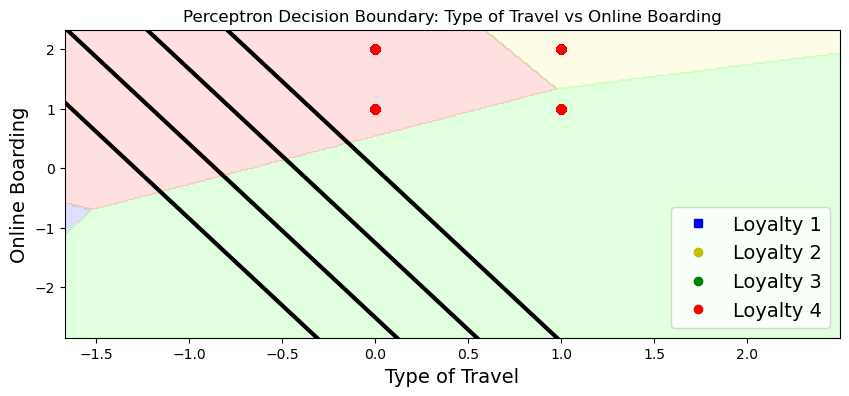

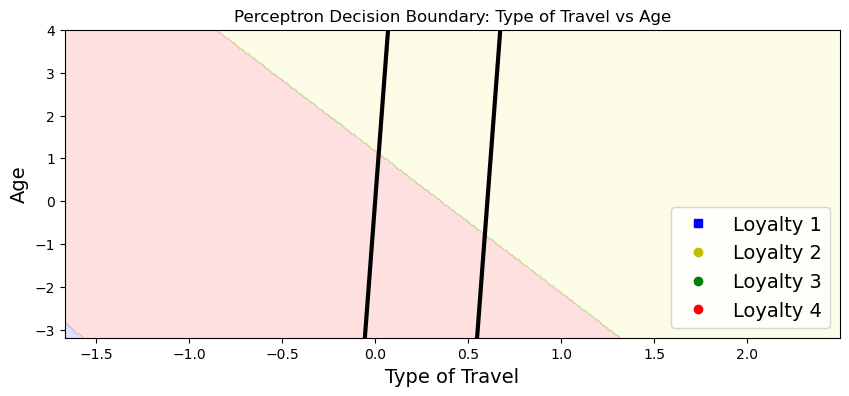

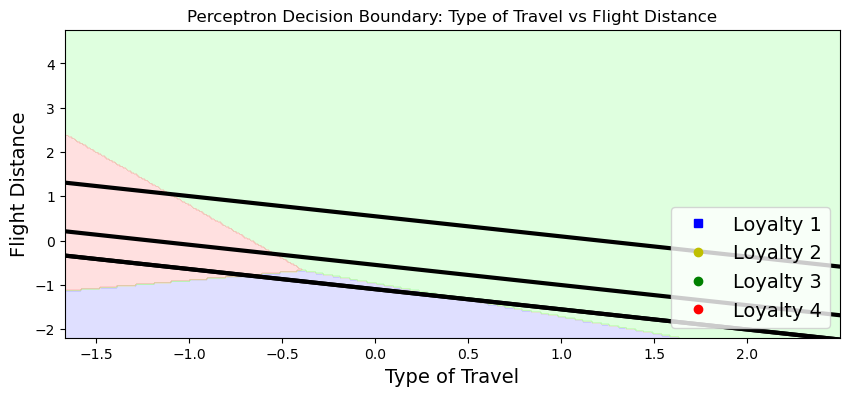

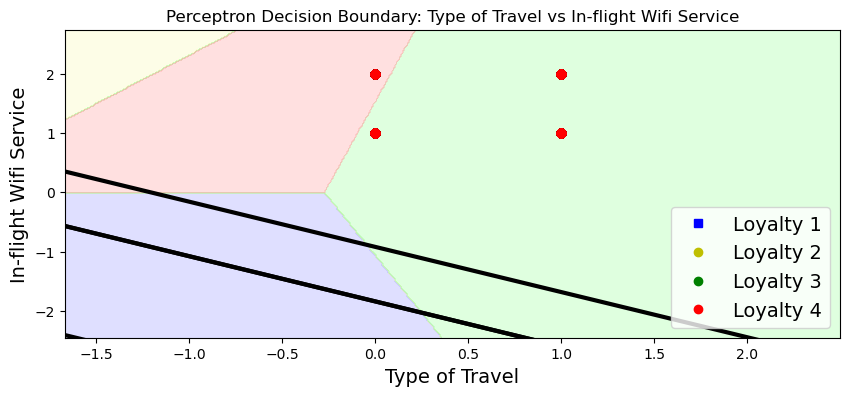

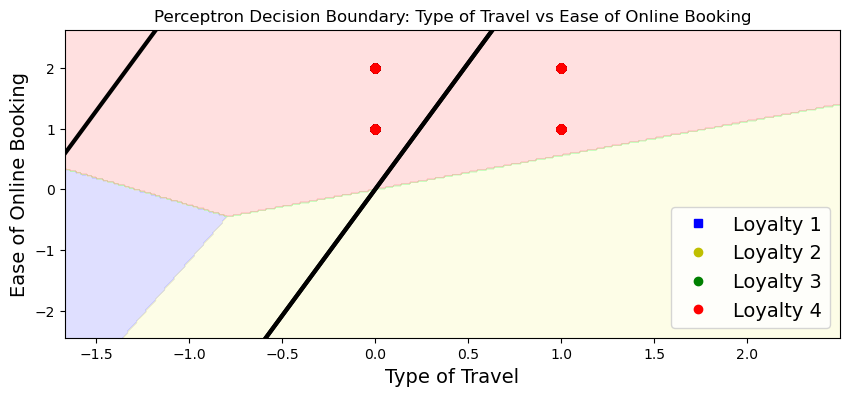

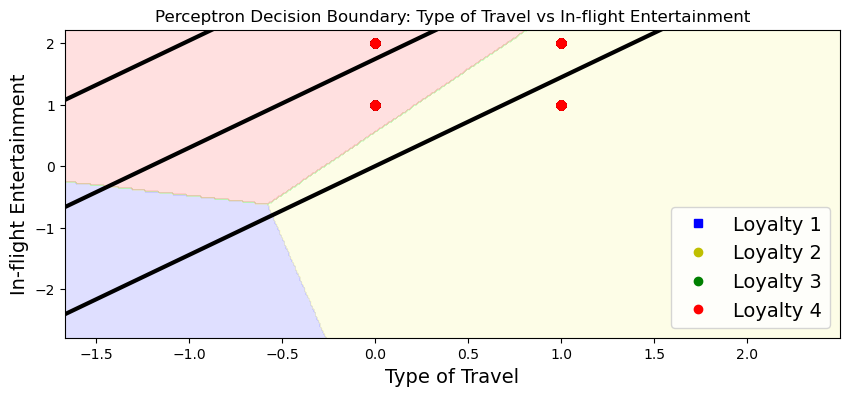

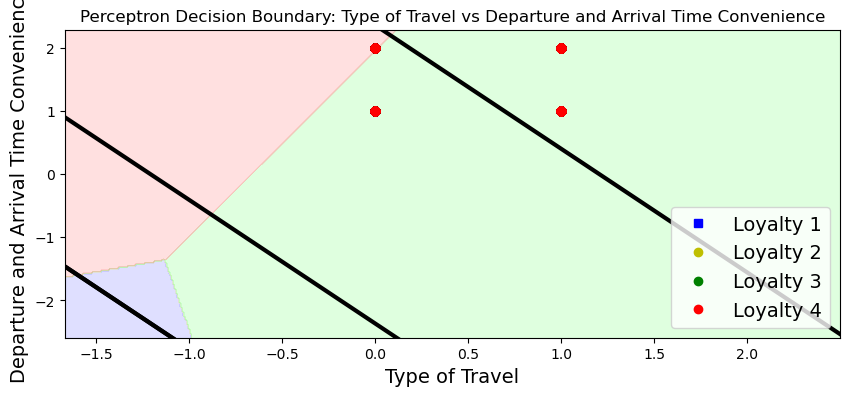

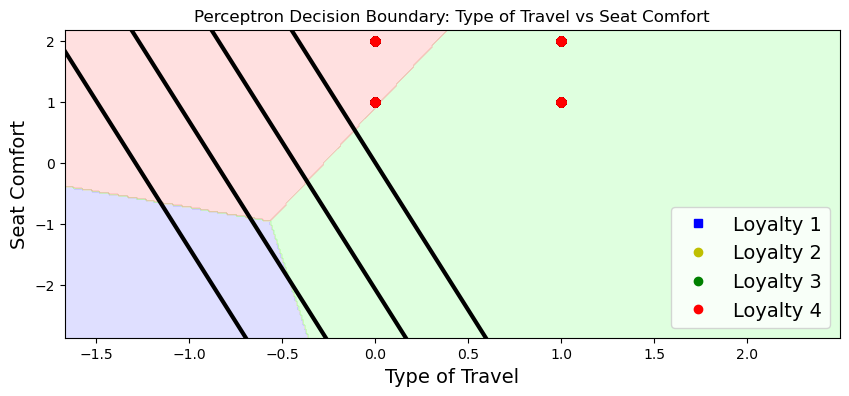

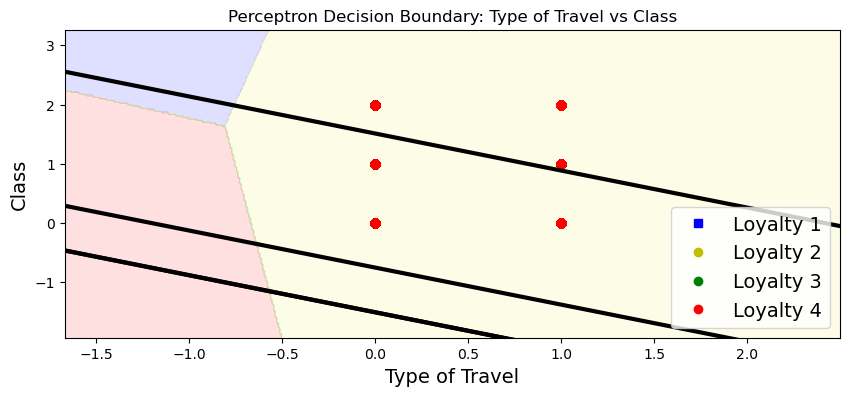

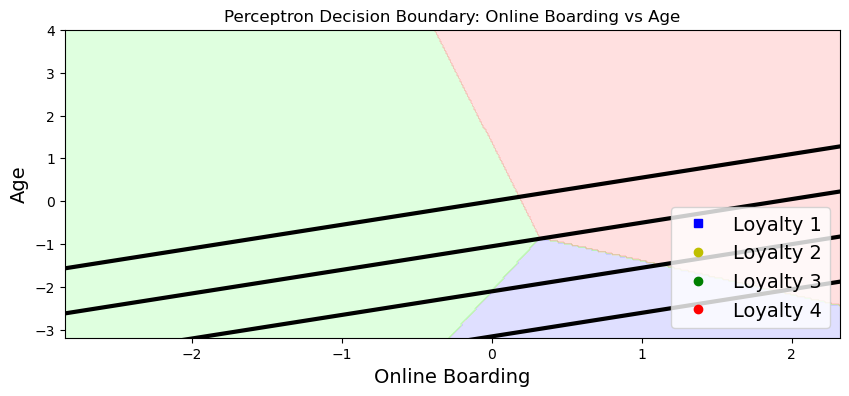

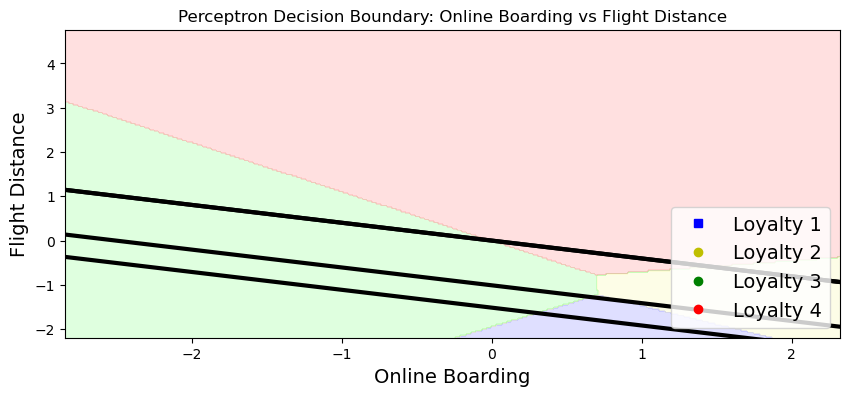

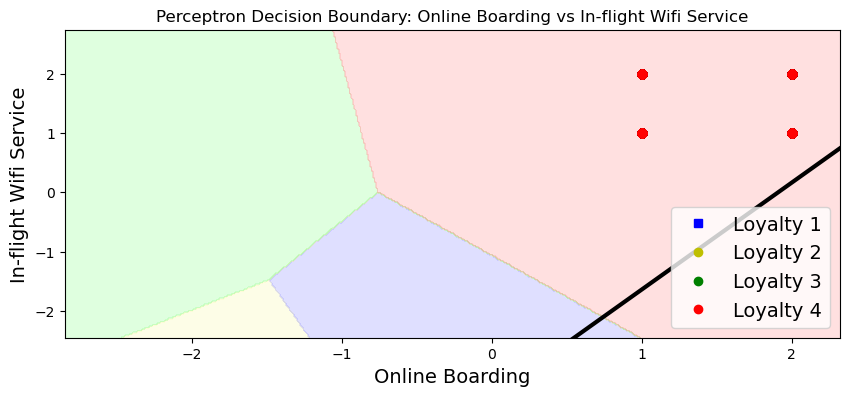

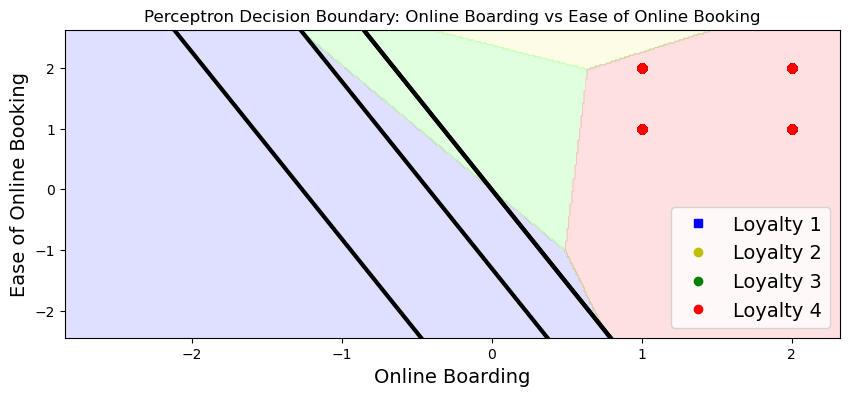

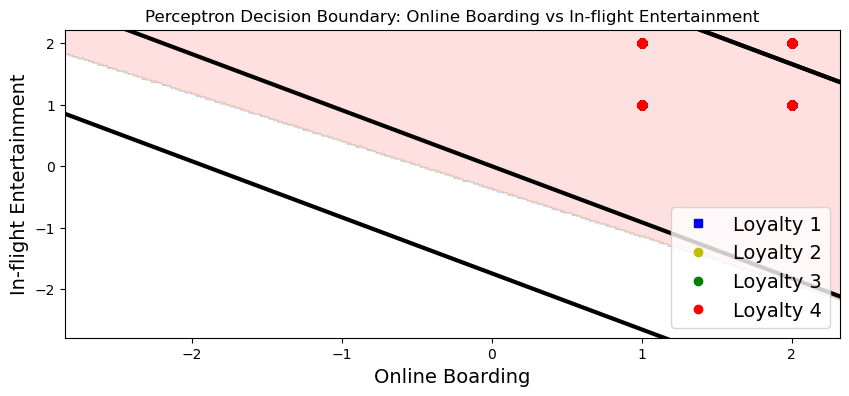

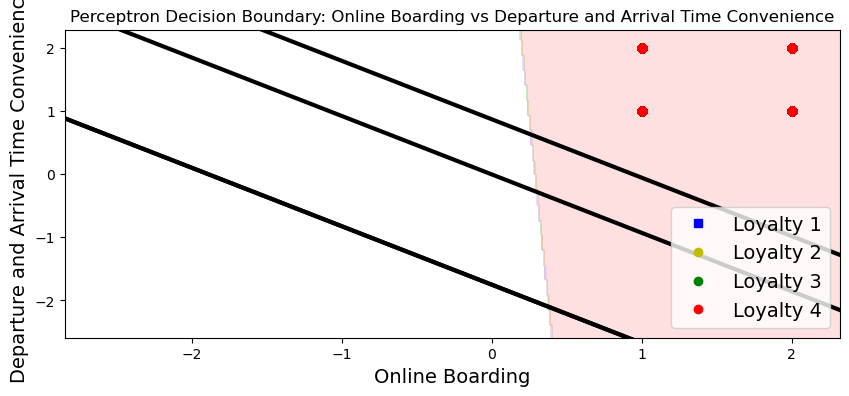

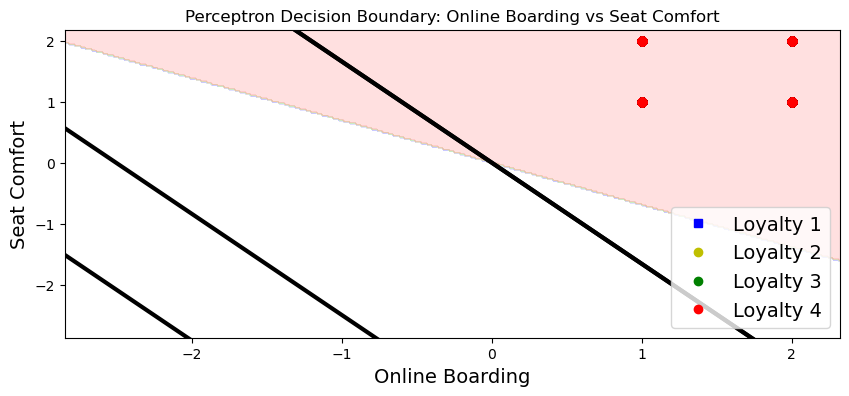

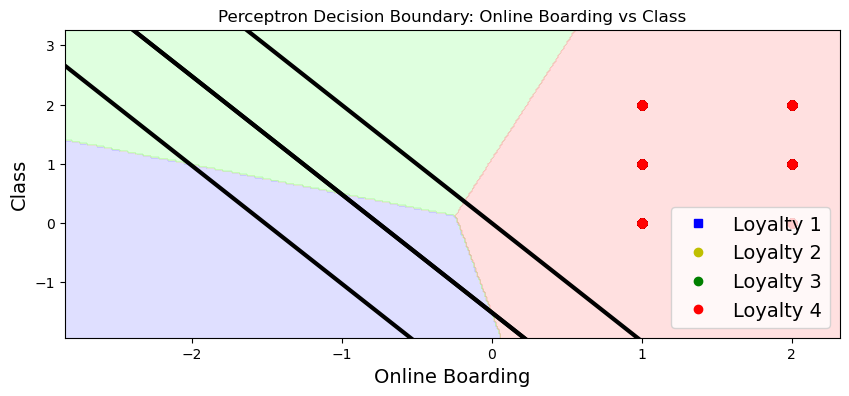

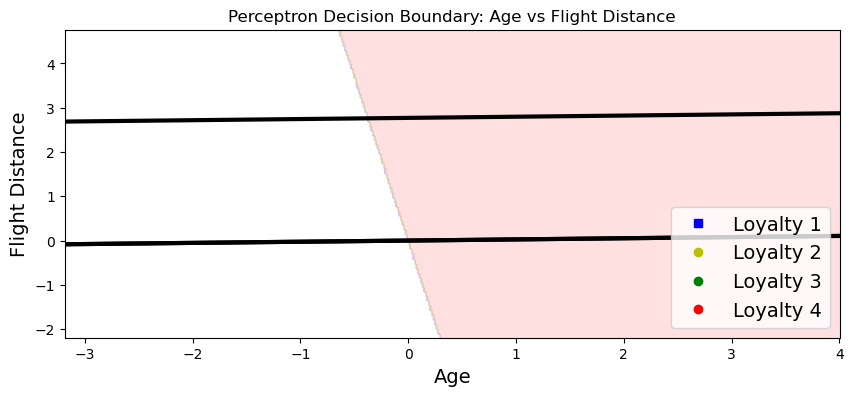

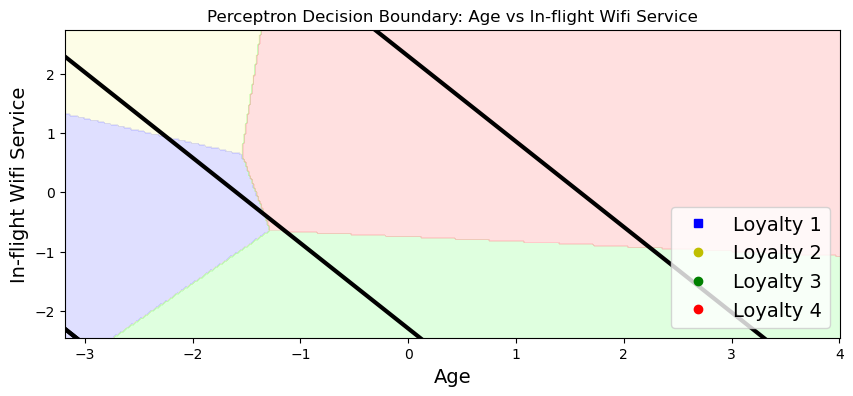

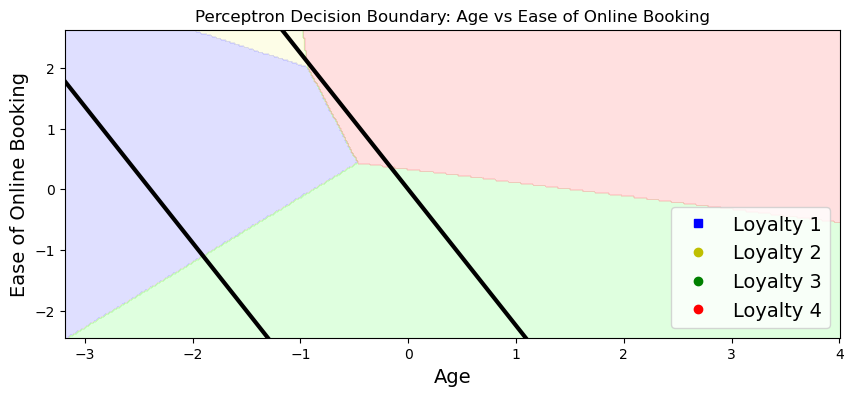

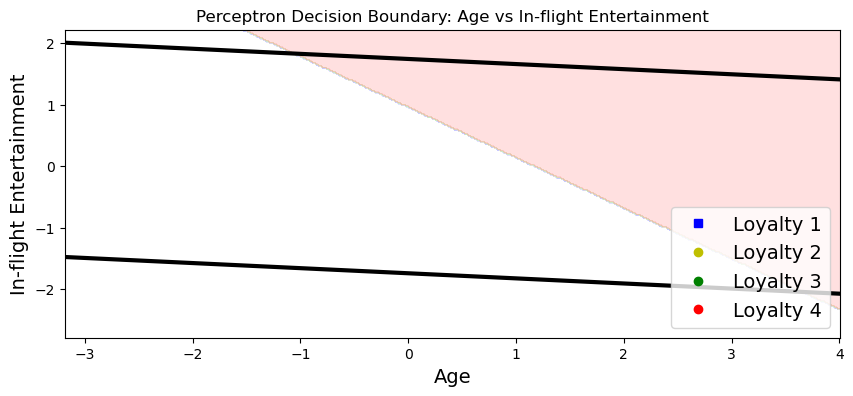

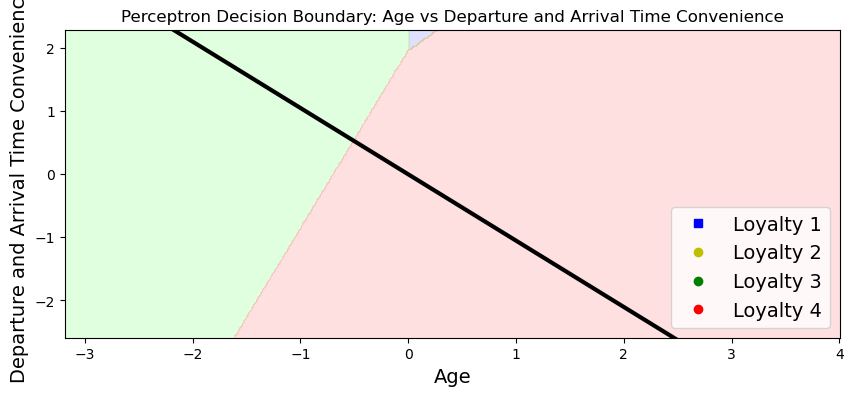

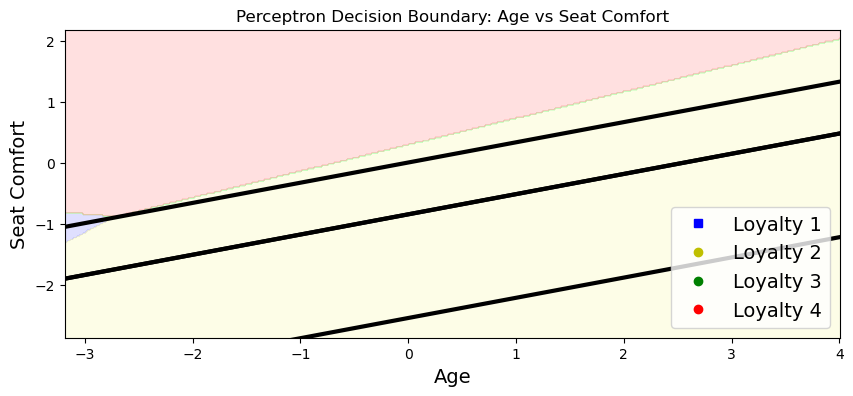

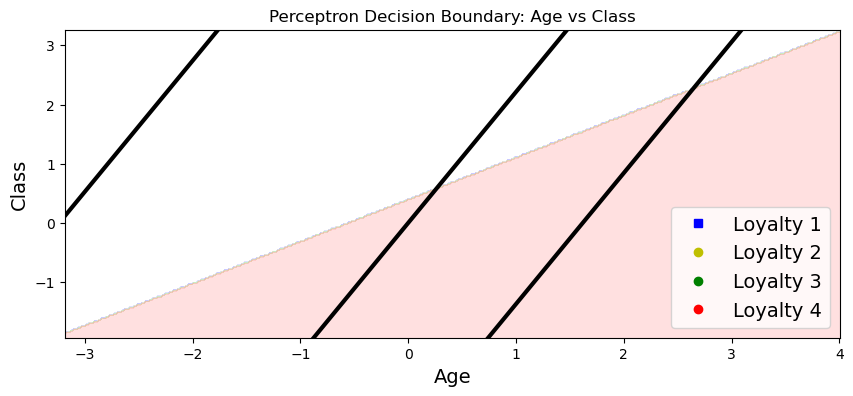

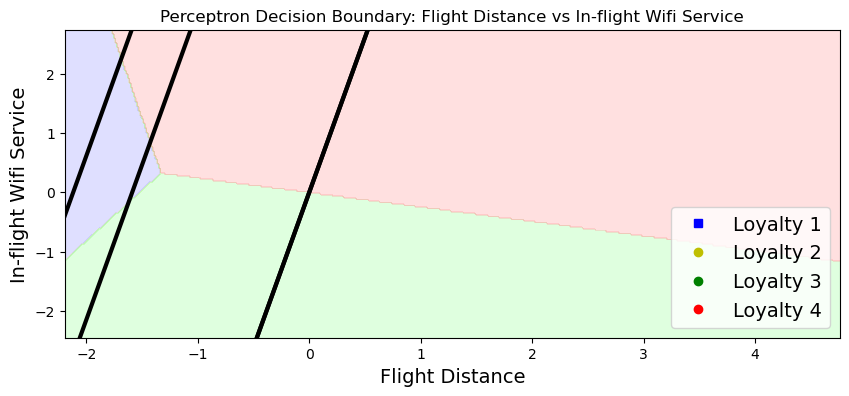

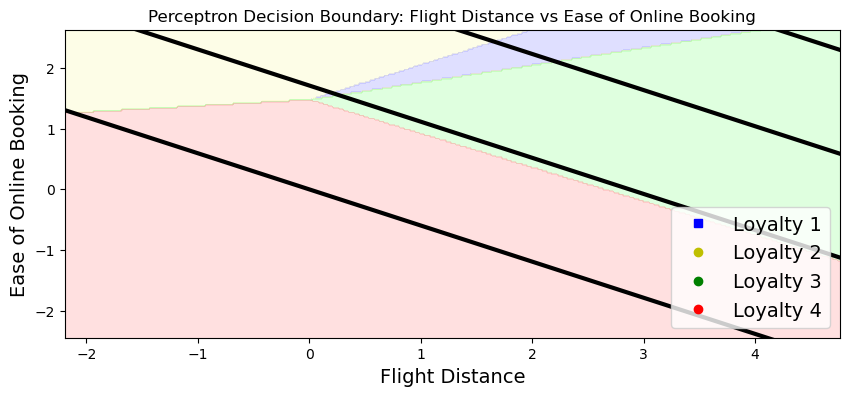

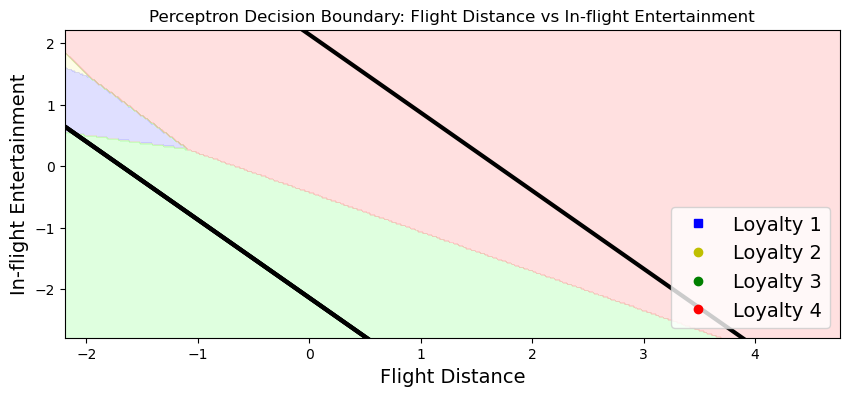

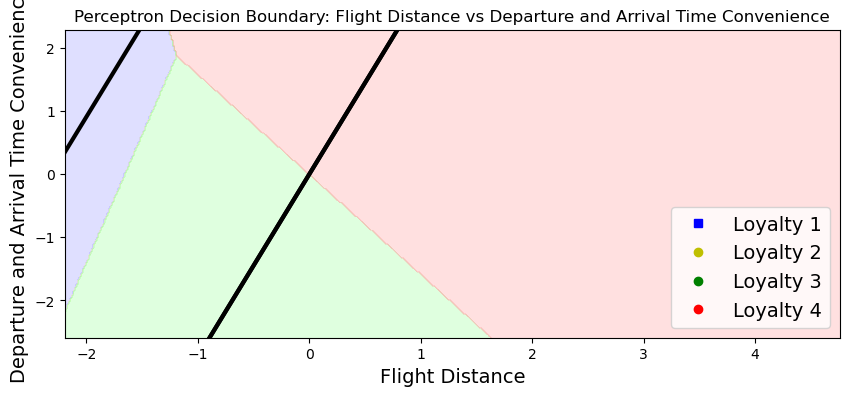

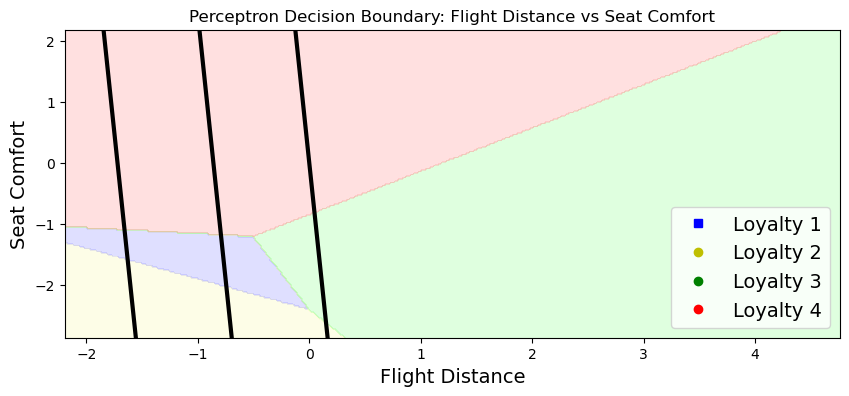

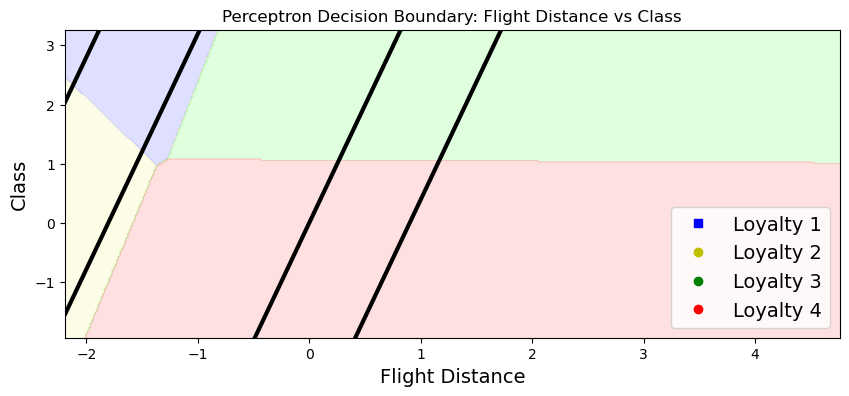

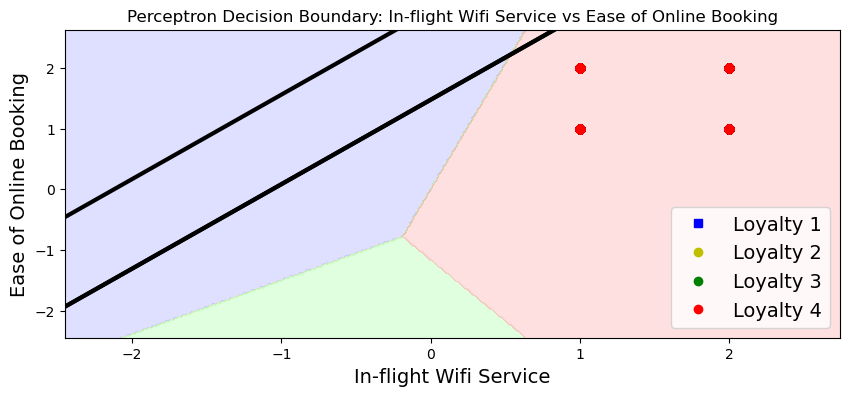

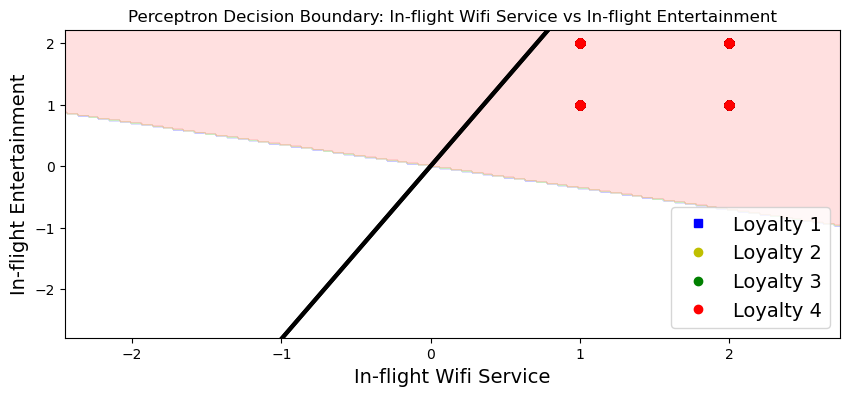

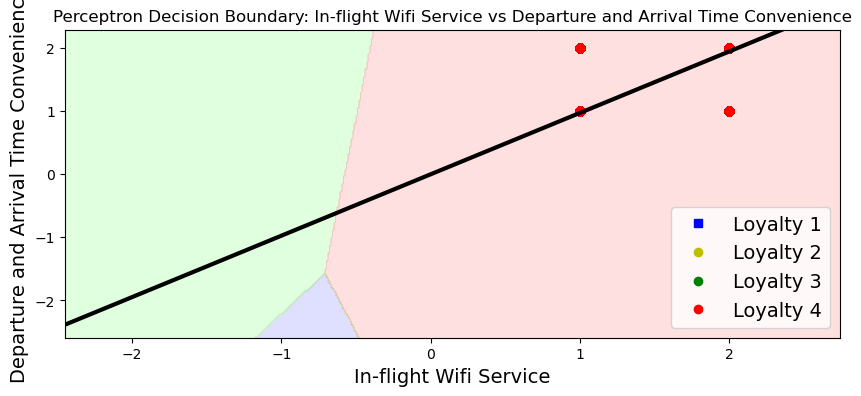

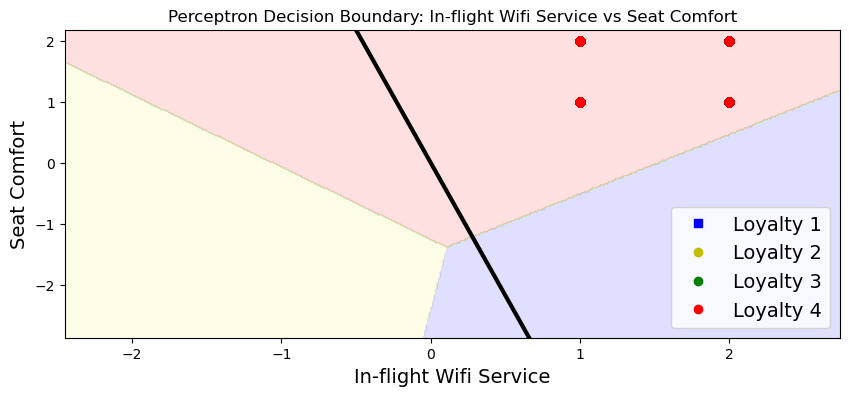

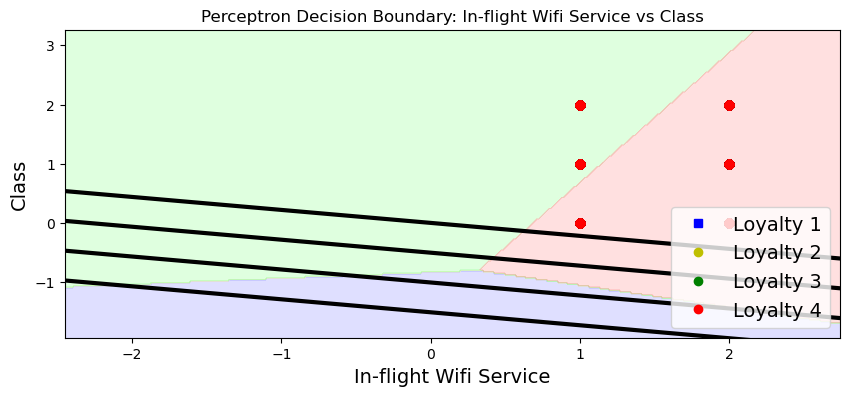

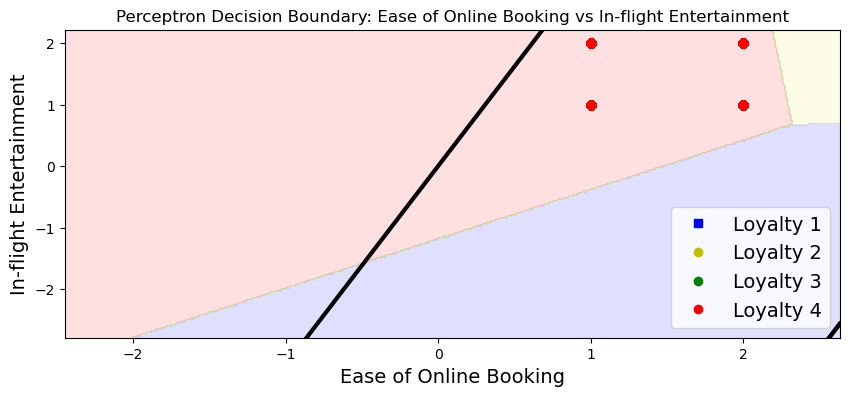

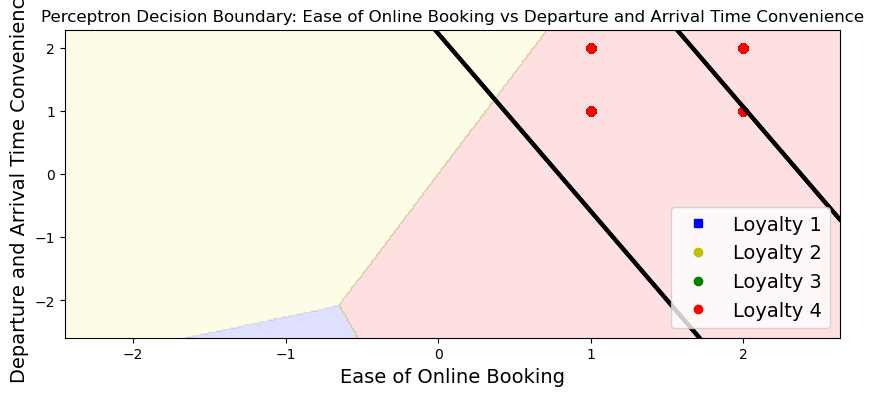

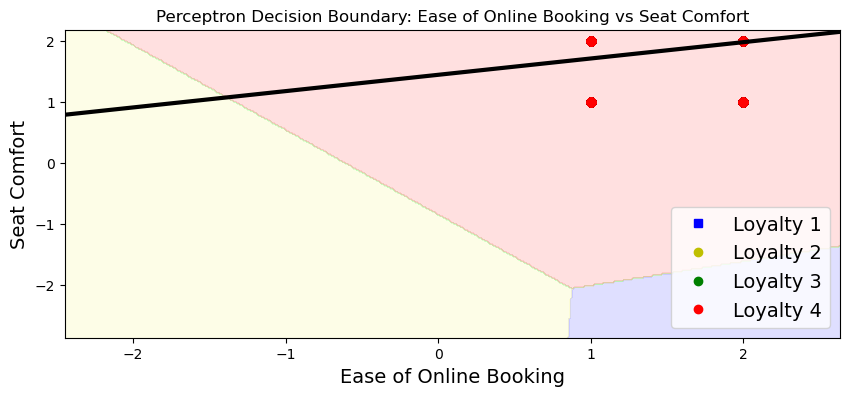

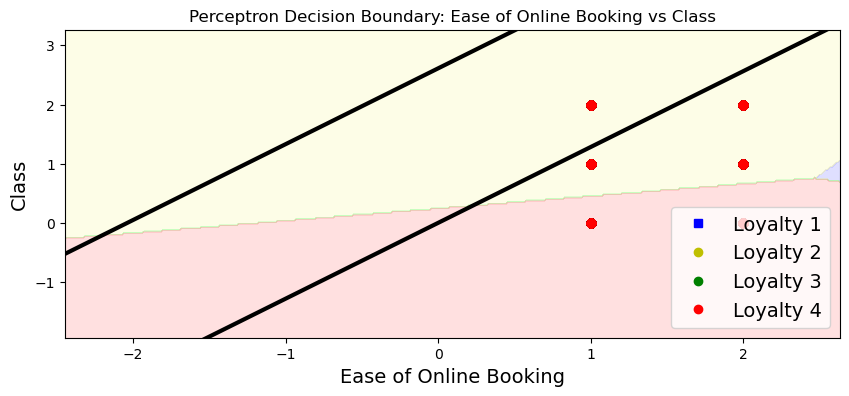

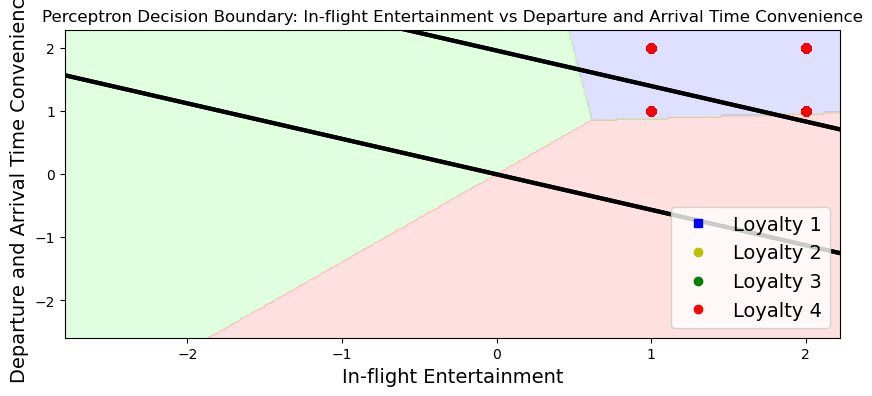

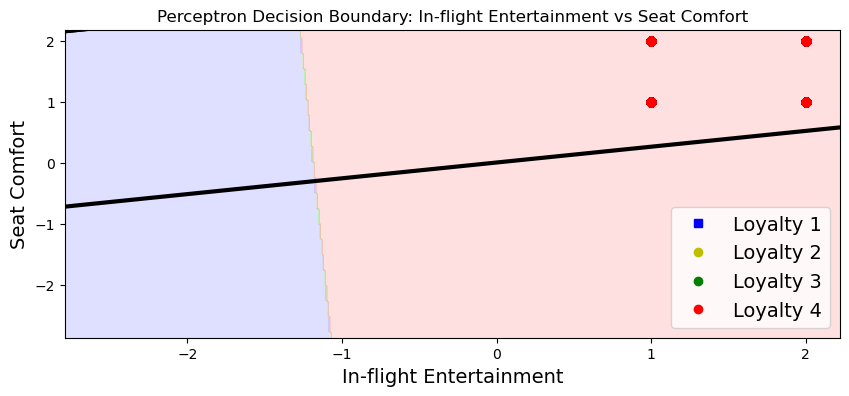

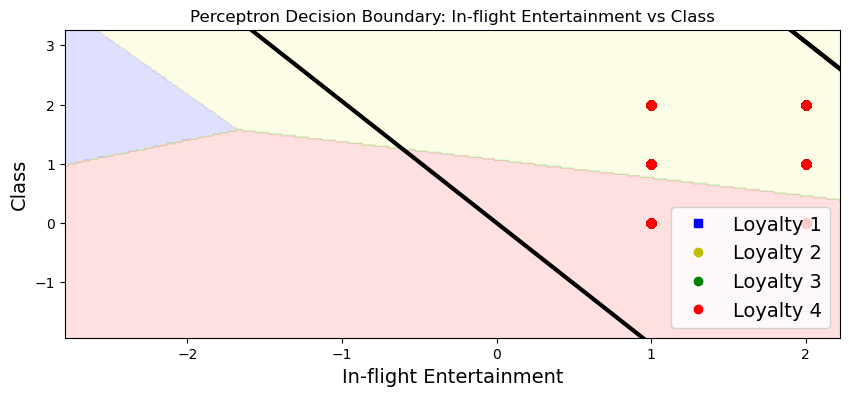

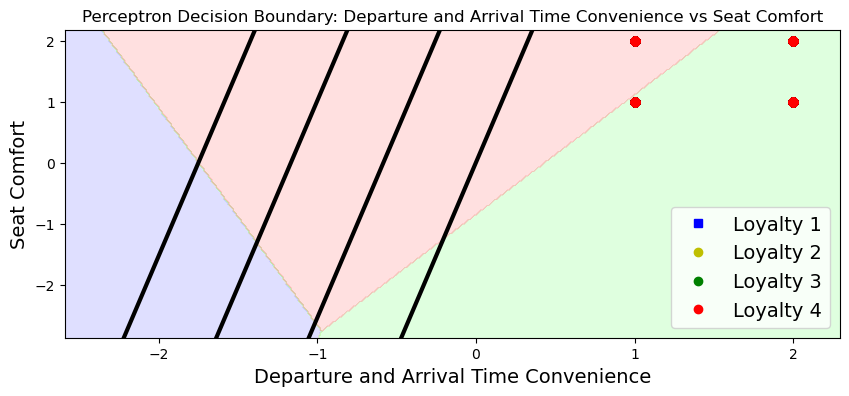

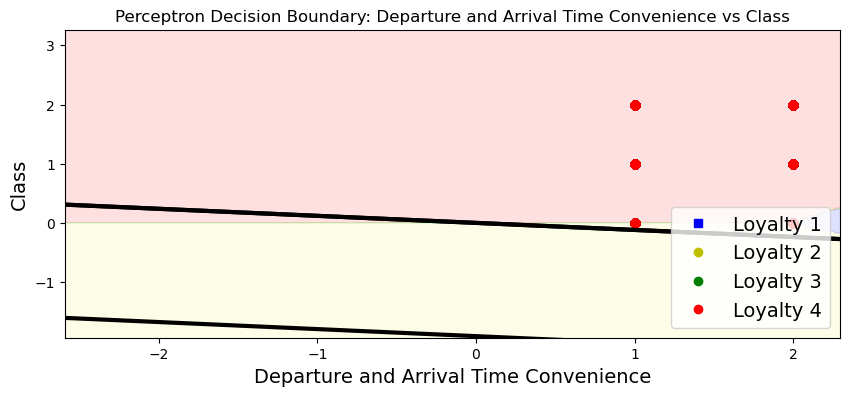

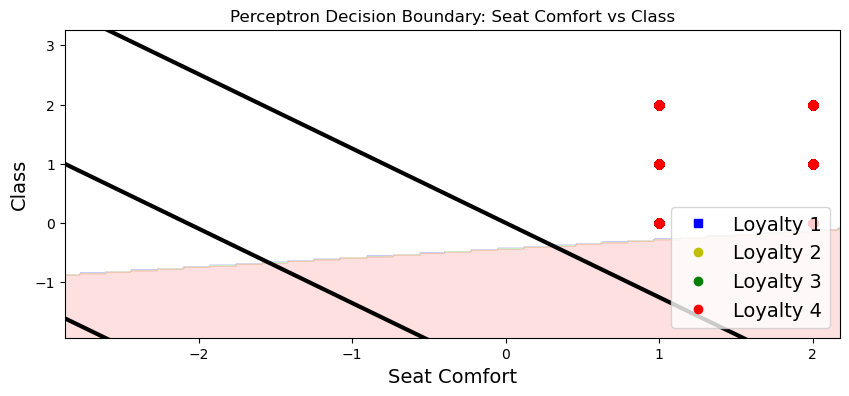

                                 Feature 1  \
0                           Type of Travel   
1                           Type of Travel   
2                           Type of Travel   
3                           Type of Travel   
4                           Type of Travel   
5                           Type of Travel   
6                           Type of Travel   
7                           Type of Travel   
8                           Type of Travel   
9                          Online Boarding   
10                         Online Boarding   
11                         Online Boarding   
12                         Online Boarding   
13                         Online Boarding   
14                         Online Boarding   
15                         Online Boarding   
16                         Online Boarding   
17                                     Age   
18                                     Age   
19                                     Age   
20                                

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Assuming you have the dataset in a pandas DataFrame called df
df = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

# List of feature names
feature_columns = [
    "Type of Travel", "Online Boarding", "In-flight Wifi Service", "Ease of Online Booking", "Age", 
    "In-flight Entertainment", "Flight Distance", "Departure and Arrival Time Convenience", 
    "Seat Comfort", "Class", "Cleanliness", "On-board Service", "Leg Room Service", "In-flight Service", 
    "Gate Location", "Baggage Handling", "Check-in Service", "Food and Drink", "Gender", "Arrival Delay", "Departure Delay"
]

# Corresponding ranks of the features (lower rank means higher priority)
feature_ranks = [
    3, 4, 7, 9, 5, 9, 5, 10, 10, 10, 13, 12, 13, 15, 17, 16, 16, 17, 16, 16, 16
]

# Create a DataFrame of feature names and their ranks
feature_rank_df = pd.DataFrame({
    "Feature": feature_columns,
    "Rank": feature_ranks
})

# Sort the features by their rank (ascending order - lower rank is better)
sorted_features = feature_rank_df.sort_values(by="Rank").reset_index(drop=True)

# Select top 10 features based on the ranking (highest priority)
top_10_features = sorted_features['Feature'].head(10).tolist()

# Extract the selected top 10 features from the DataFrame
X = df[top_10_features].values

# The target variable (Loyalty)
y = df['Loyalty'].values

# Feature names for plotting purposes
feature_names = top_10_features

# List to store the results of accuracies
accuracy_results = []

# Iterate over pairs of selected features
for i in range(len(top_10_features)):
    for j in range(i + 1, len(top_10_features)):
        feature_x = top_10_features[i]
        feature_y = top_10_features[j]

        # Extract the selected features
        X_selected = X[:, [i, j]]

        # Standardize the selected features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_selected)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Initialize and train the Perceptron model (no need for multi_class='ovr')
        per_clf = Perceptron(random_state=42)
        per_clf.fit(X_train, y_train)

        # Evaluate the model accuracy on the test set
        y_pred = per_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results.append([feature_names[i], feature_names[j], accuracy * 100])

        # Plotting the decision boundary for visualization
        a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
        b = -per_clf.intercept_ / per_clf.coef_[0][1]

        axes = [X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1,
                X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1]

        # Create a mesh grid for visualization
        x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
        X_new = np.c_[x0.ravel(), x1.ravel()]

        # Predict using the trained Perceptron model
        y_predict = per_clf.predict(X_new)
        zz = y_predict.reshape(x0.shape)

        # Plot the decision boundary and data points
        plt.figure(figsize=(10, 4))

        # Scatter plot of the points
        plt.plot(X_selected[y == 0, 0], X_selected[y == 0, 1], "bs", label="Loyalty 1")
        plt.plot(X_selected[y == 1, 0], X_selected[y == 1, 1], "yo", label="Loyalty 2")
        plt.plot(X_selected[y == 2, 0], X_selected[y == 2, 1], "go", label="Loyalty 3")
        plt.plot(X_selected[y == 3, 0], X_selected[y == 3, 1], "ro", label="Loyalty 4")

        # Plot the decision boundary line
        plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

        # Create a custom colormap
        custom_cmap = ListedColormap(['#9898ff', '#fafab0', '#98ff98', '#ff9999'])

        # Contour plot of decision regions
        plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha=0.3)

        # Set plot labels
        plt.xlabel(feature_names[i], fontsize=14)
        plt.ylabel(feature_names[j], fontsize=14)
        plt.legend(loc="lower right", fontsize=14)
        plt.axis(axes)
        plt.title(f"Perceptron Decision Boundary: {feature_names[i]} vs {feature_names[j]}")
        plt.show()

# Create a DataFrame to display the results
accuracy_df = pd.DataFrame(accuracy_results, columns=["Feature 1", "Feature 2", "Accuracy (%)"])

# Display the results
print(accuracy_df)


Key Insights:
Feature Importance:

Type of Travel appears frequently as Feature 1, showing it has a significant relationship with multiple other features. Its accuracy with other features (like "Online Boarding" and "Age") is relatively high (e.g., 71.82% with "Online Boarding").
Other features like Age, Flight Distance, and Seat Comfort also appear frequently as either Feature 1 or Feature 2, indicating they are important in distinguishing between classes in the dataset.
Accuracy Distribution:

The accuracy values vary greatly, ranging from around 19.79% (Feature pair "Seat Comfort" vs "Class") to 71.82% (Feature pair "Type of Travel" vs "Online Boarding").
Feature combinations with higher accuracy: Features like Type of Travel paired with Online Boarding (71.82%) and Age paired with Online Boarding (65.14%) show higher accuracies, suggesting these feature pairs are more predictive of the target variable (likely loyalty).
Lower accuracy pairs: Some pairs like Ease of Online Booking with other features (e.g., "Flight Distance" 49.45%, "In-flight Wifi Service" 47.68%) show much lower accuracy, which suggests that these features may be less effective in predicting loyalty or that the model is struggling to make distinct decisions with these feature pairs.
Feature Correlation:

Some features consistently appear together in higher accuracy pairs, such as Online Boarding and Age, or Flight Distance with Seat Comfort. This suggests there may be a relationship or dependency between these features.
Features with lower accuracy might have weak correlations with each other, or perhaps are less informative on their own.
Feature Impact:

Features such as "Seat Comfort", "In-flight Wifi Service", and "Class" tend to show a more variable accuracy depending on the pairing. This suggests that their predictive power may depend on the interaction with other features, and they might need to be combined with other features to provide meaningful information.
What Can We Learn?
Important Features: Features like "Type of Travel", "Online Boarding", and "Age" are key in predicting the target variable (likely customer loyalty). They should be prioritized for further analysis or modeling.
Feature Pairs: Some feature pairs provide much better performance than others. For instance, the combination of "Type of Travel" and "Online Boarding" is among the best in terms of accuracy. Feature pairs like "Ease of Online Booking" and "Flight Distance" show lower performance and might be less important or redundant.
Feature Interactions: The way features interact can significantly affect the model's performance. This indicates that feature engineering could help identify more effective interactions between features.

### MLP

Accuracy: 91.70%


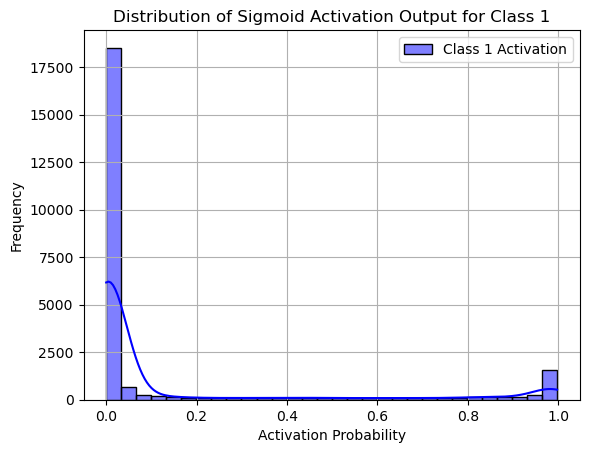

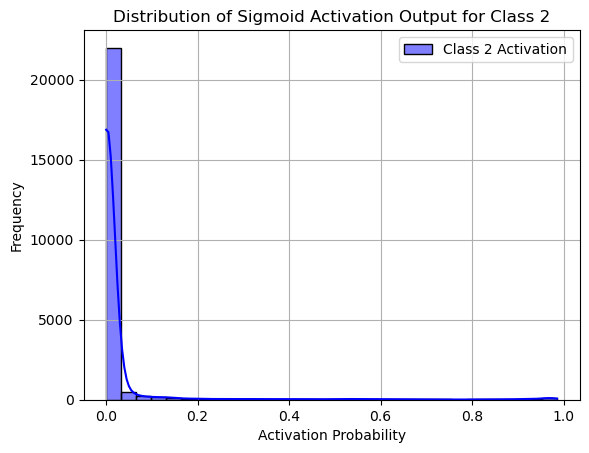

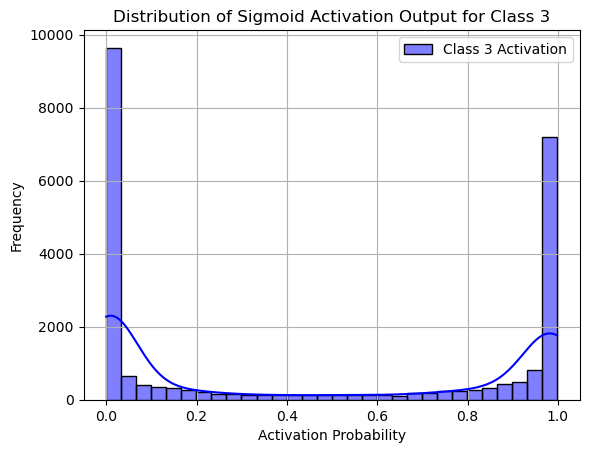

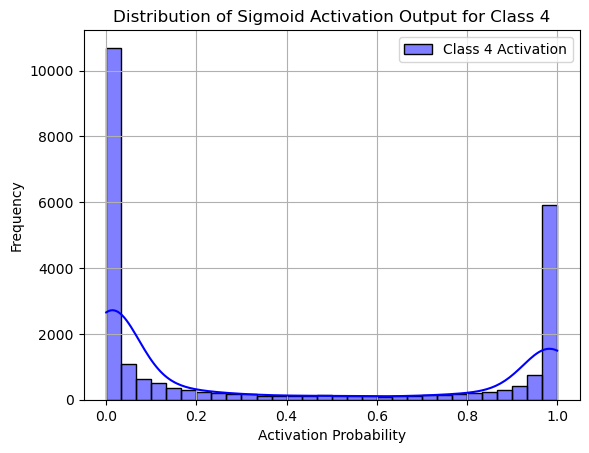

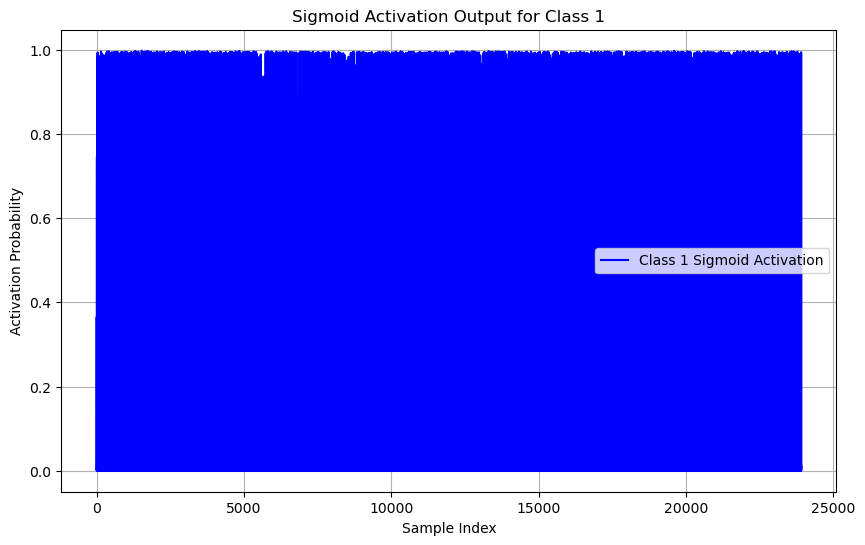

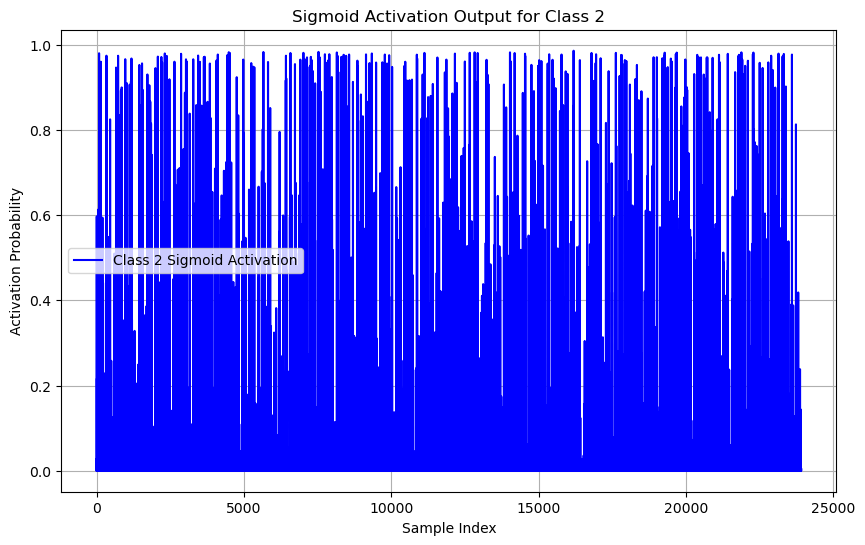

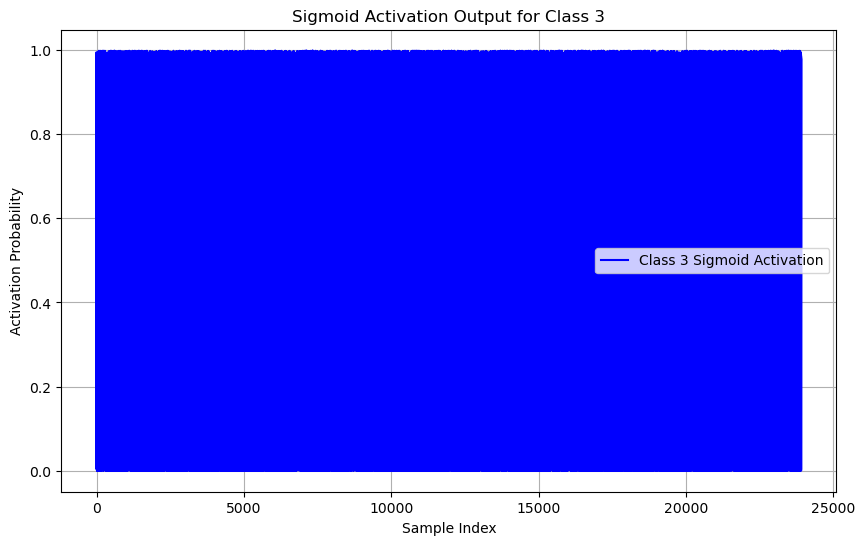

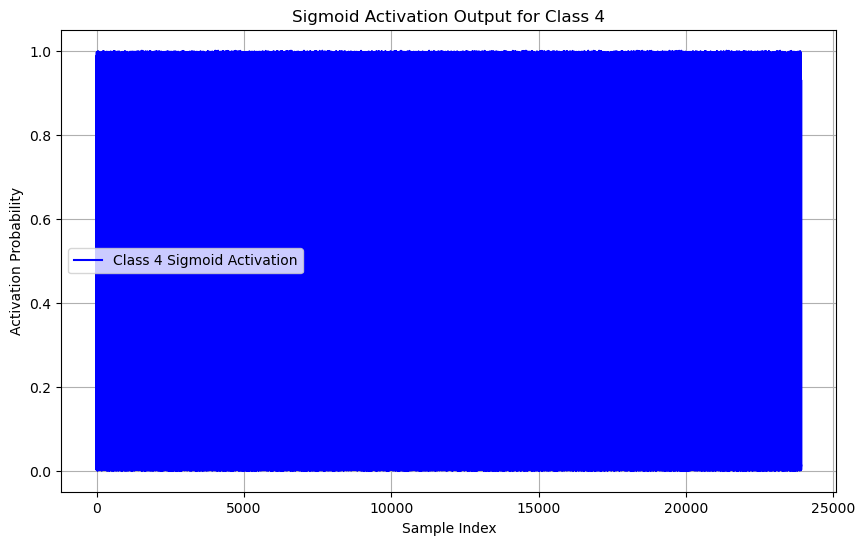

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the URL
data_url = 'https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv'
data = pd.read_csv(data_url)

# Separate features (X) and target (y)
X = data.drop(columns=['Loyalty'])  # All columns except 'Loyalty' are features
y = data['Loyalty']  # 'Loyalty' is the target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network with a sigmoid activation function
model = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model's accuracy
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualize the activations (Sigmoid activation outputs for all classes)
activations = model.predict_proba(X_test)  # Get output from the output layer (probabilities)

# Check distributions of activation probabilities for each class
for i in range(4):  # 4 classes (loyalty 1, 2, 3, 4)
    sns.histplot(activations[:, i], kde=True, label=f'Class {i+1} Activation', color='b', bins=30)
    plt.title(f'Distribution of Sigmoid Activation Output for Class {i+1}')
    plt.xlabel('Activation Probability')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create separate plots for each class
for i in range(4):  # 4 classes (loyalty 1, 2, 3, 4)
    plt.figure(figsize=(10, 6))
    plt.plot(activations[:, i], label=f'Class {i+1} Sigmoid Activation', color='b')
    plt.title(f'Sigmoid Activation Output for Class {i+1}')
    plt.xlabel('Sample Index')
    plt.ylabel('Activation Probability')
    plt.legend()
    plt.grid(True)
    plt.show()


The high bars near 0 and 1 in the activation plots indicate that our model is overconfident about its predictions for certain classes. Specifically:

High Bars at 0: This suggests that the model is very confident that these samples don't belong to the class, i.e., the activation value is very close to 0 for those samples.
High Bars at 1: This means the model is almost certain that these samples belong to the class, with activation values close to 1.

Accuracy: 88.84%


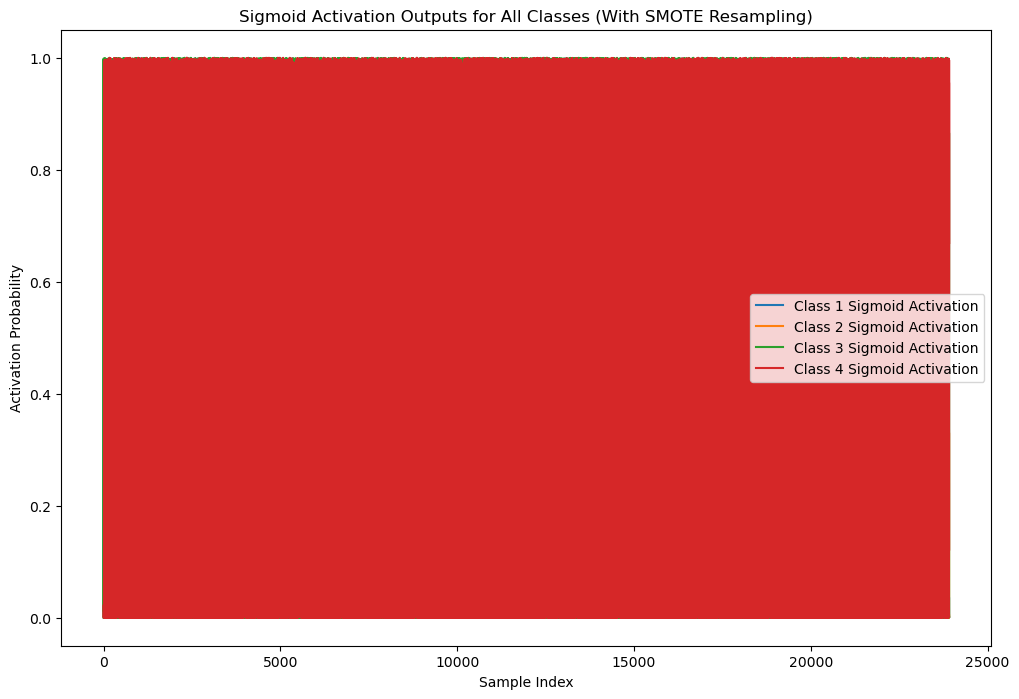

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_url = 'https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv'
data = pd.read_csv(data_url)

# Separate features (X) and target (y)
X = data.drop(columns=['Loyalty'])  # All columns except 'Loyalty' are features
y = data['Loyalty']  # 'Loyalty' is the target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a neural network with a sigmoid activation function, L2 regularization, and no class weights
model = MLPClassifier(
    hidden_layer_sizes=(10,), 
    activation='logistic', 
    random_state=42, 
    max_iter=1000,  # Increase iterations if needed
    alpha=0.001,  # L2 regularization (Ridge)
    solver='adam'  # Adam optimizer is often more efficient
)

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model's accuracy
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualize the activations (Sigmoid activation outputs for all classes)
activations = model.predict_proba(X_test)  # Get output from the output layer (probabilities)

# Plot activations for each class
plt.figure(figsize=(12, 8))
for i in range(4):  # 4 classes (loyalty 1, 2, 3, 4)
    plt.plot(activations[:, i], label=f'Class {i+1} Sigmoid Activation')

plt.legend()
plt.title('Sigmoid Activation Outputs for All Classes (With SMOTE Resampling)')
plt.xlabel('Sample Index')
plt.ylabel('Activation Probability')
plt.show()



Accuracy: 88.84%


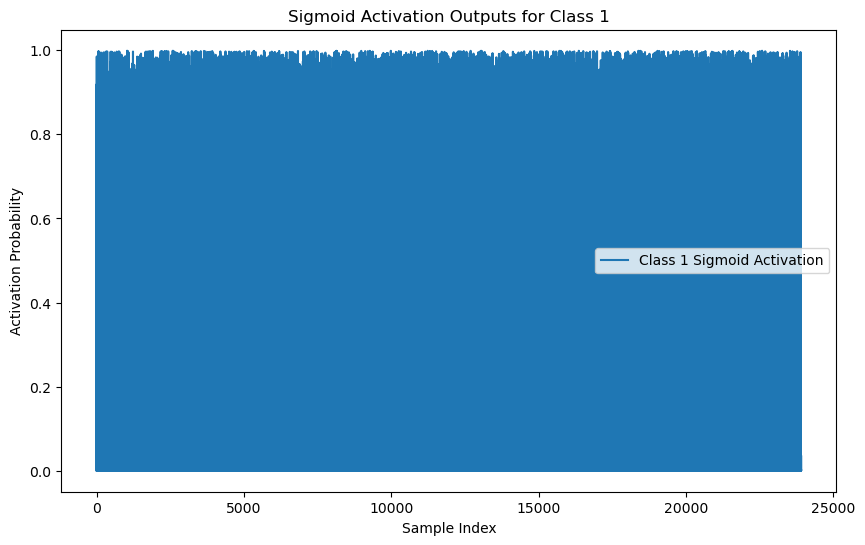

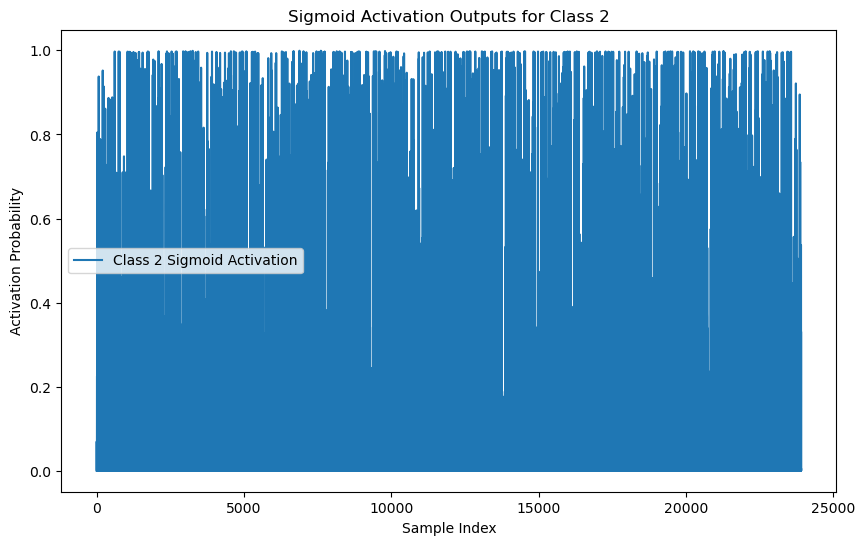

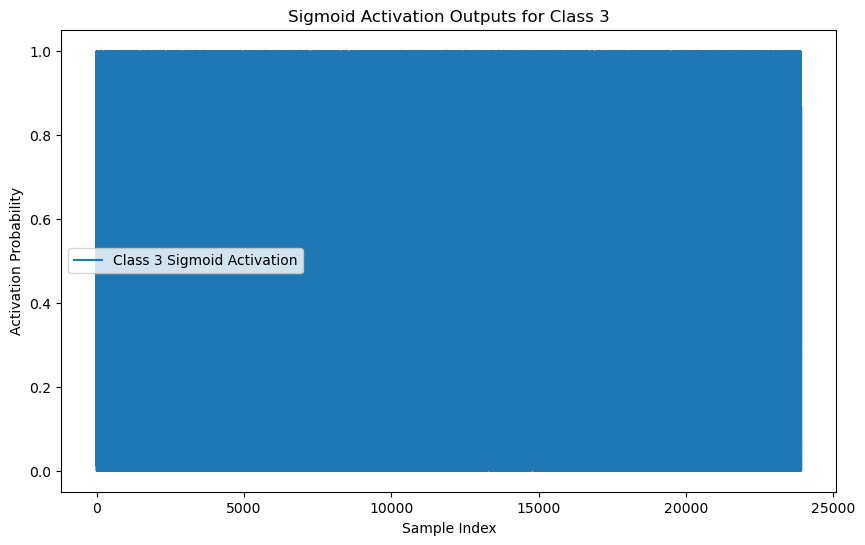

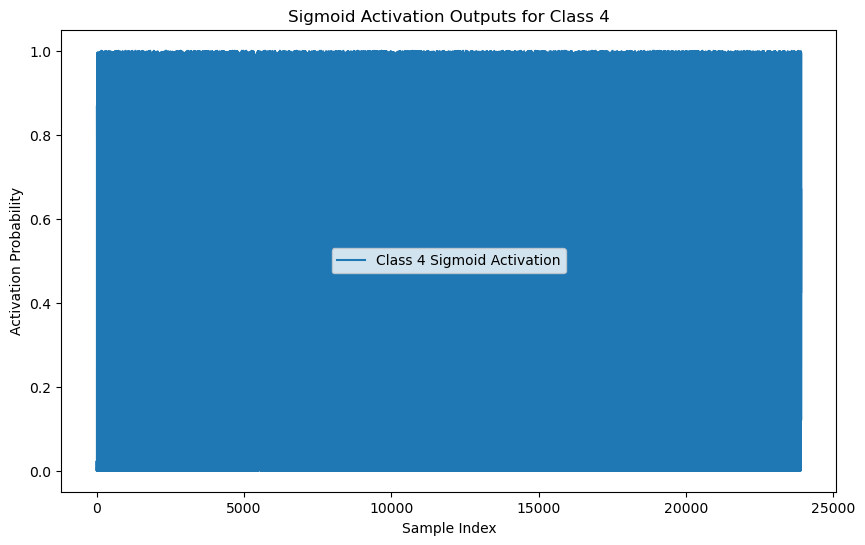

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_url = 'https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv'
data = pd.read_csv(data_url)

# Separate features (X) and target (y)
X = data.drop(columns=['Loyalty'])  # All columns except 'Loyalty' are features
y = data['Loyalty']  # 'Loyalty' is the target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a neural network with a sigmoid activation function, L2 regularization, and no class weights
model = MLPClassifier(
    hidden_layer_sizes=(10,), 
    activation='logistic', 
    random_state=42, 
    max_iter=1000,  # Increase iterations if needed
    alpha=0.001,  # L2 regularization (Ridge)
    solver='adam'  # Adam optimizer is often more efficient
)

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model's accuracy
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualize the activations (Sigmoid activation outputs for all classes)
activations = model.predict_proba(X_test)  # Get output from the output layer (probabilities)

# Plot activations for each class separately
for i in range(4):  # 4 classes (loyalty 1, 2, 3, 4)
    plt.figure(figsize=(10, 6))
    plt.plot(activations[:, i], label=f'Class {i+1} Sigmoid Activation')
    plt.legend()
    plt.title(f'Sigmoid Activation Outputs for Class {i+1}')
    plt.xlabel('Sample Index')
    plt.ylabel('Activation Probability')
    plt.show()


## with top 10 features

Accuracy: 88.16%


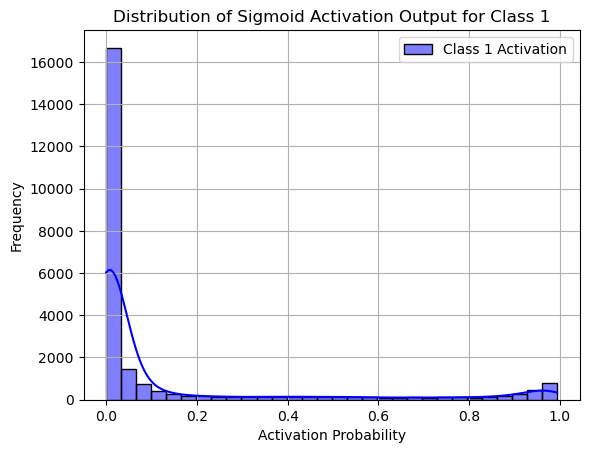

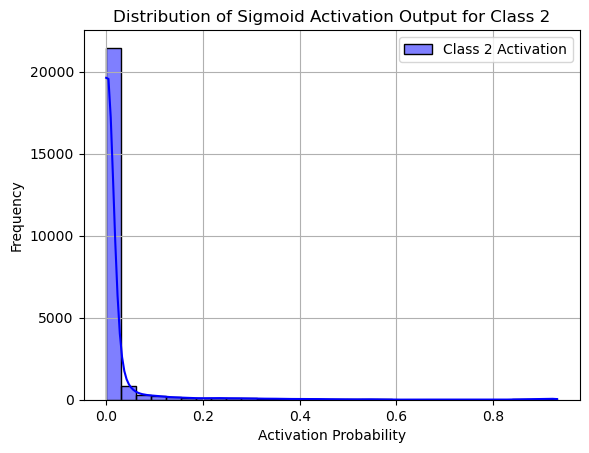

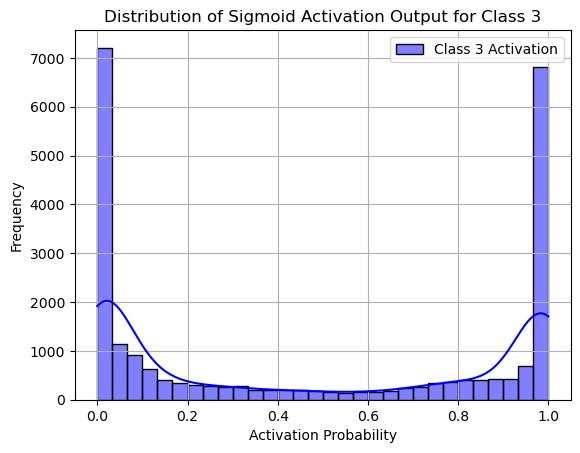

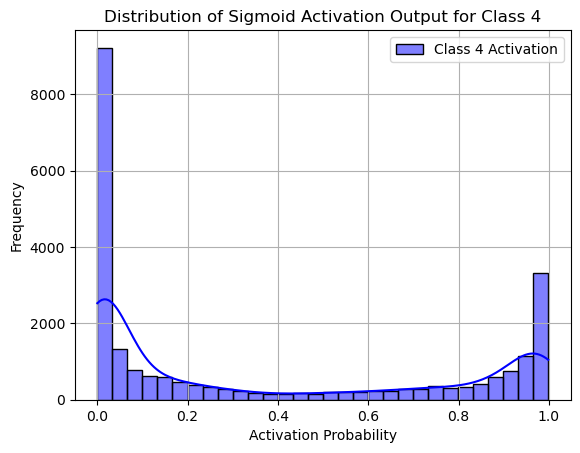

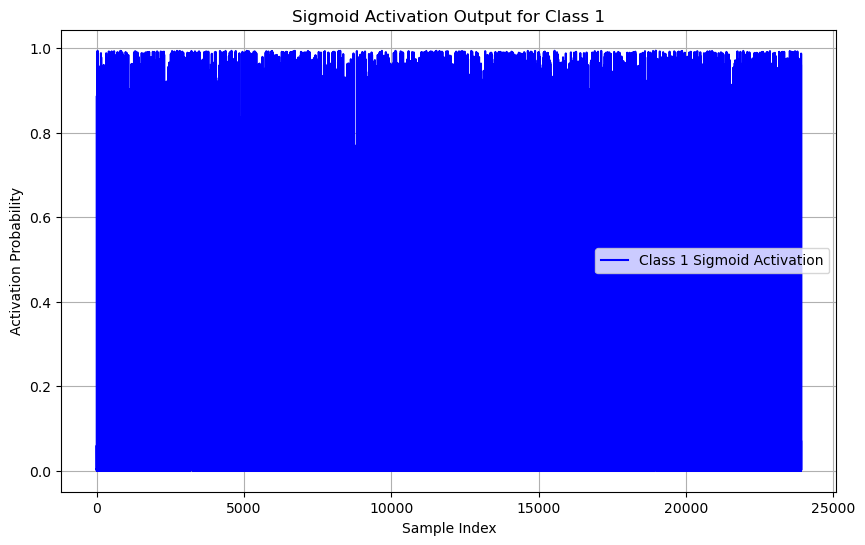

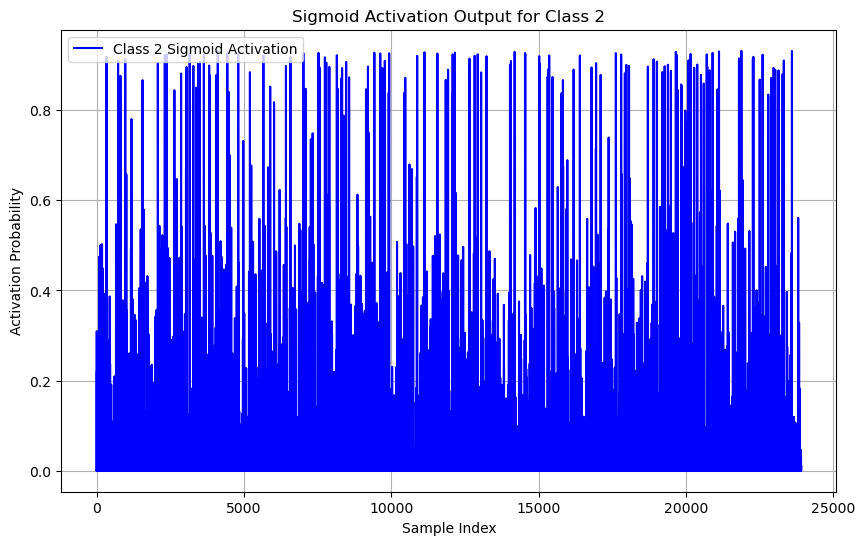

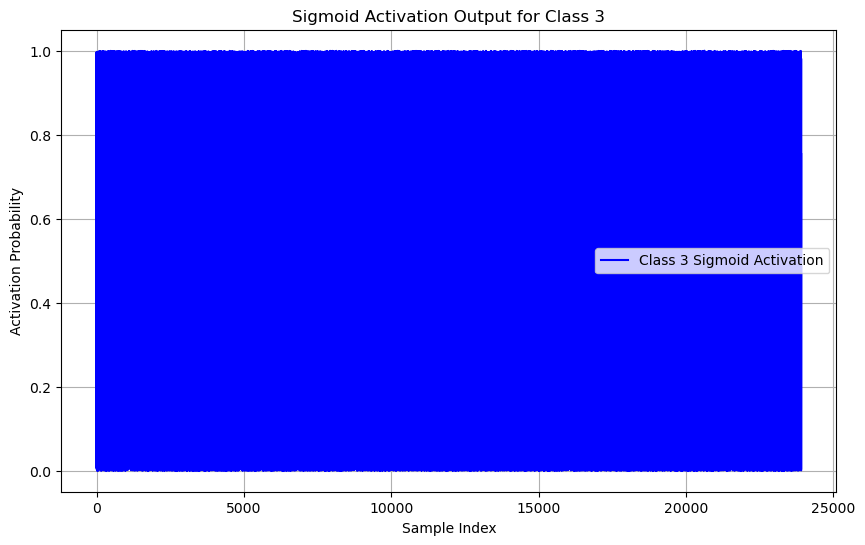

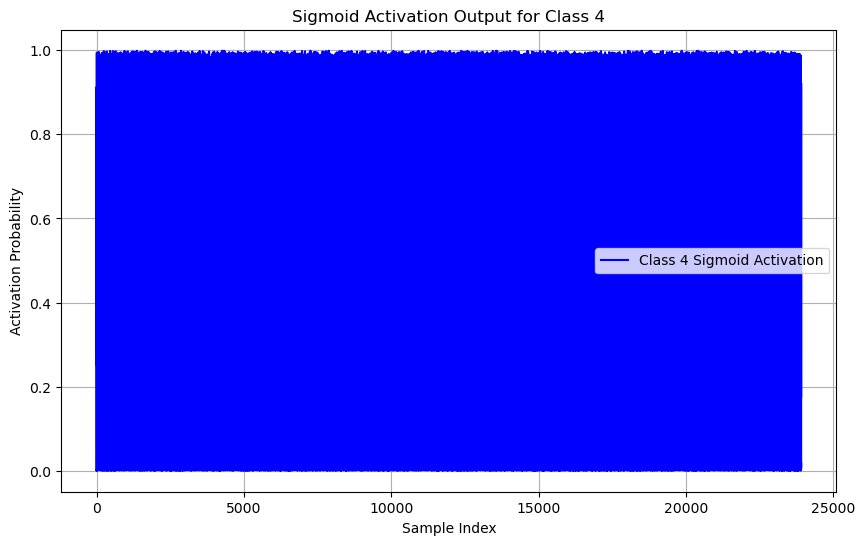

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the URL
df = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

# List of feature names
feature_columns = [
    "Type of Travel", "Online Boarding", "In-flight Wifi Service", "Ease of Online Booking", "Age", 
    "In-flight Entertainment", "Flight Distance", "Departure and Arrival Time Convenience", 
    "Seat Comfort", "Class", "Cleanliness", "On-board Service", "Leg Room Service", "In-flight Service", 
    "Gate Location", "Baggage Handling", "Check-in Service", "Food and Drink", "Gender", "Arrival Delay", "Departure Delay"
]

# Corresponding ranks of the features (lower rank means higher priority)
feature_ranks = [
    3, 4, 7, 9, 5, 9, 5, 10, 10, 10, 13, 12, 13, 15, 17, 16, 16, 17, 16, 16, 16
]

# Create a DataFrame of feature names and their ranks
feature_rank_df = pd.DataFrame({
    "Feature": feature_columns,
    "Rank": feature_ranks
})

# Sort the features by their rank (ascending order - lower rank is better)
sorted_features = feature_rank_df.sort_values(by="Rank").reset_index(drop=True)

# Select top 10 features based on the ranking (highest priority)
top_10_features = sorted_features['Feature'].head(10).tolist()

# Extract the selected top 10 features from the DataFrame
X = df[top_10_features].values

# The target variable (Loyalty)
y = df['Loyalty'].values

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network with a sigmoid activation function
model = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model's accuracy
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualize the activations (Sigmoid activation outputs for all classes)
activations = model.predict_proba(X_test)  # Get output from the output layer (probabilities)

# Check distributions of activation probabilities for each class
for i in range(4):  # 4 classes (loyalty 1, 2, 3, 4)
    sns.histplot(activations[:, i], kde=True, label=f'Class {i+1} Activation', color='b', bins=30)
    plt.title(f'Distribution of Sigmoid Activation Output for Class {i+1}')
    plt.xlabel('Activation Probability')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create separate plots for each class
for i in range(4):  # 4 classes (loyalty 1, 2, 3, 4)
    plt.figure(figsize=(10, 6))
    plt.plot(activations[:, i], label=f'Class {i+1} Sigmoid Activation', color='b')
    plt.title(f'Sigmoid Activation Output for Class {i+1}')
    plt.xlabel('Sample Index')
    plt.ylabel('Activation Probability')
    plt.legend()
    plt.grid(True)
    plt.show()


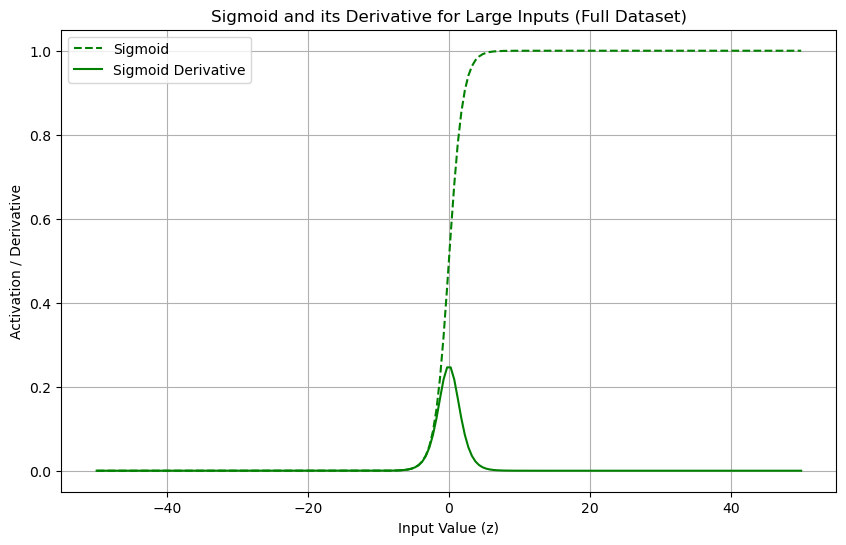

In [25]:
# Assuming `df` is our DataFrame and you have top_10_features already
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

# Define the sigmoid and its derivative functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def derivative(sigmoid_function, z):
    return sigmoid_function(z) * (1 - sigmoid_function(z))

# Generate z values
z_large = np.linspace(-50, 50, 200)

# Plot for the entire dataset (using all features)
plt.figure(figsize=(10, 6))
plt.plot(z_large, sigmoid(z_large), "g--", label="Sigmoid")
plt.plot(z_large, derivative(sigmoid, z_large), "g-", label="Sigmoid Derivative")
plt.title("Sigmoid and its Derivative for Large Inputs (Full Dataset)")
plt.xlabel("Input Value (z)")
plt.ylabel("Activation / Derivative")
plt.legend()
plt.grid(True)
plt.show()


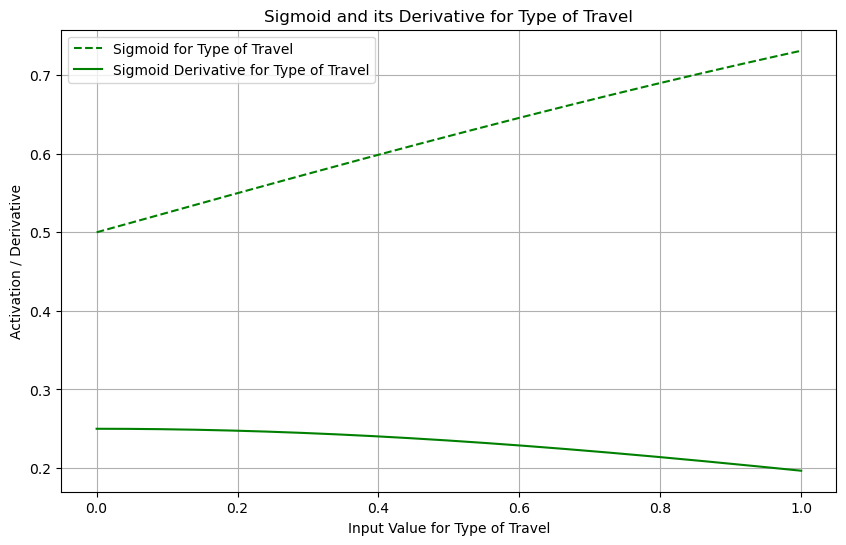

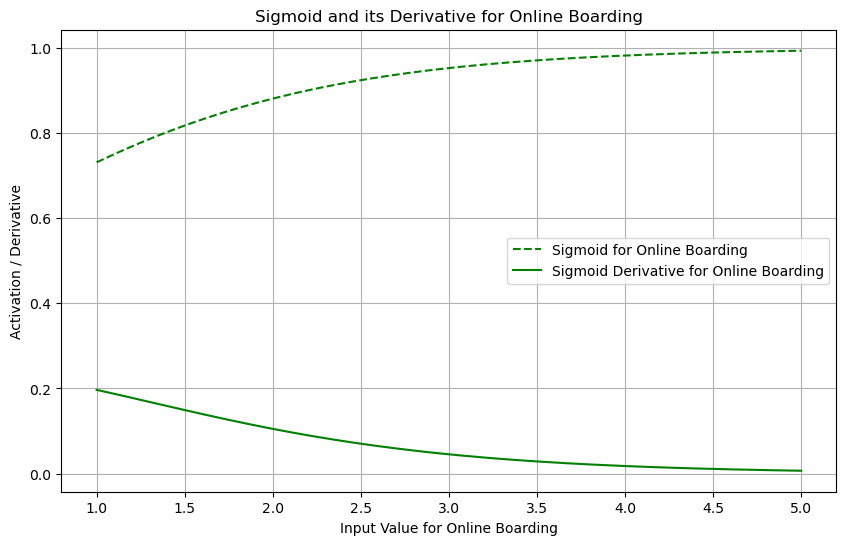

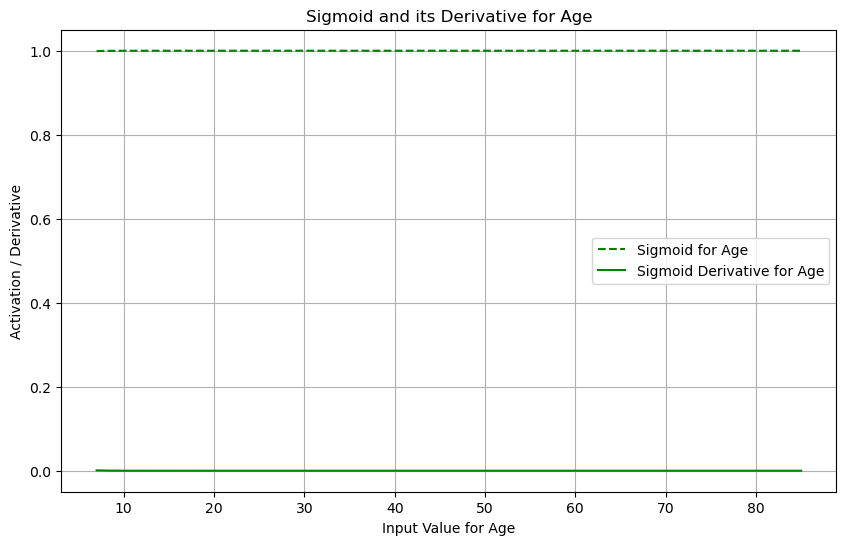

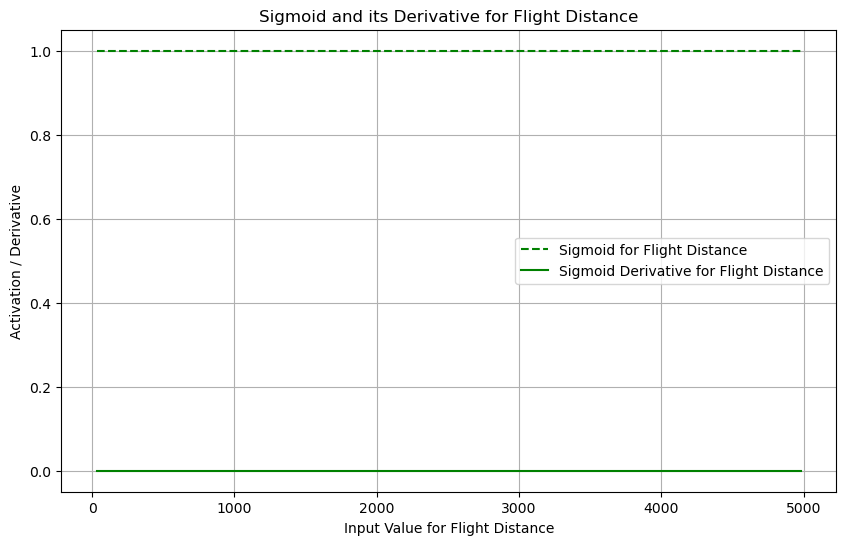

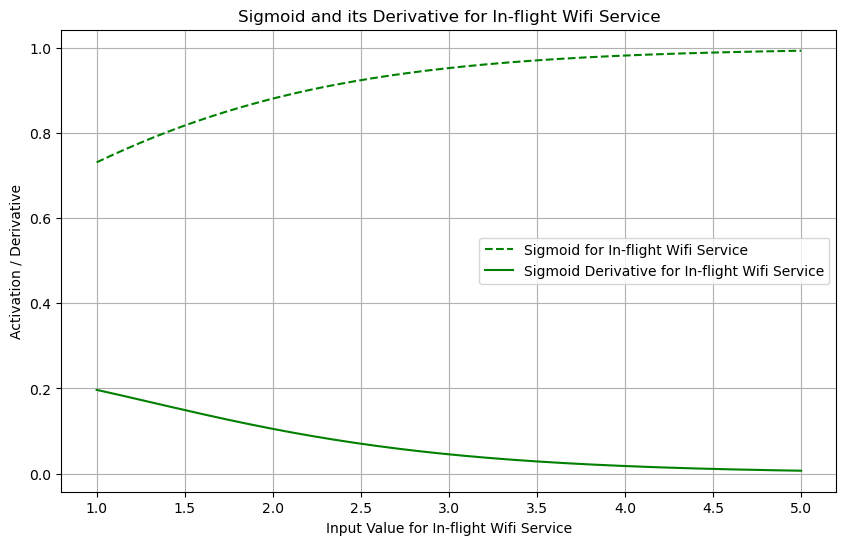

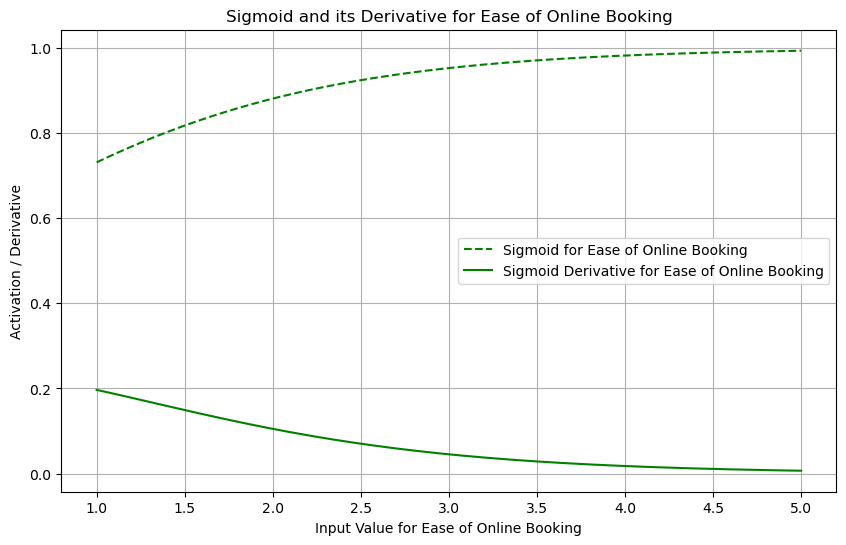

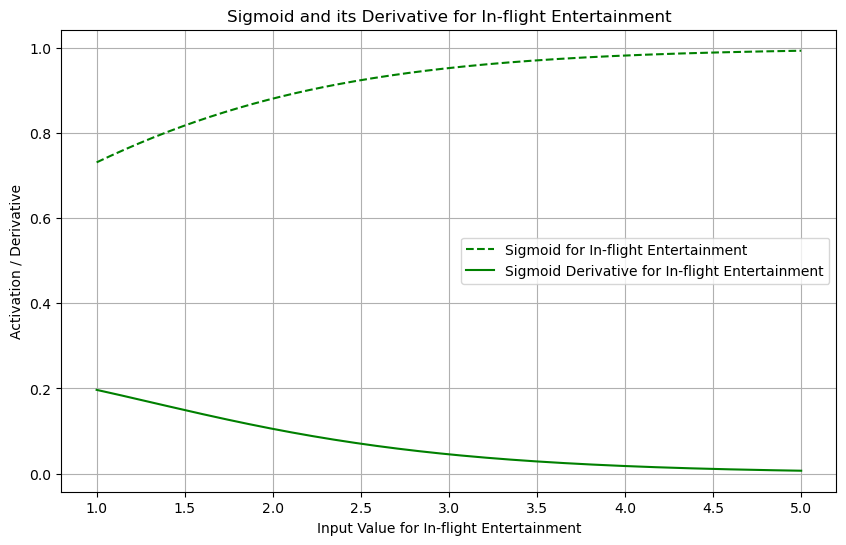

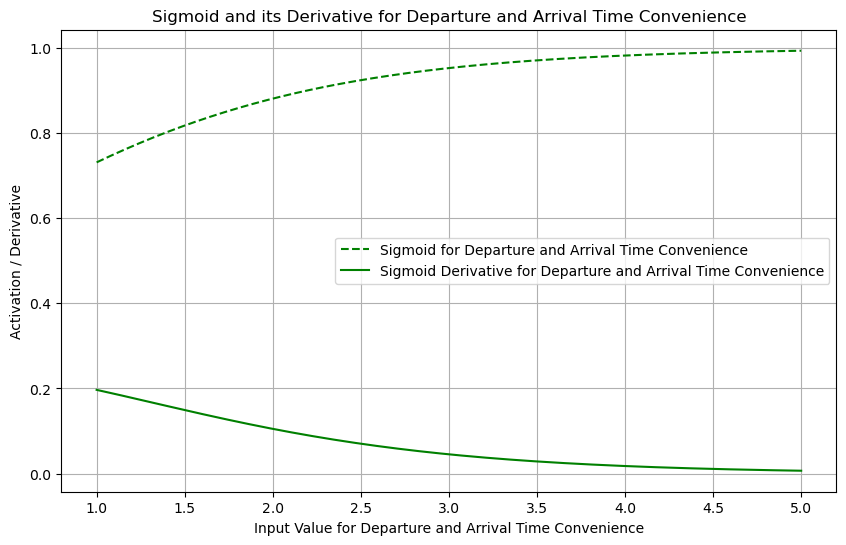

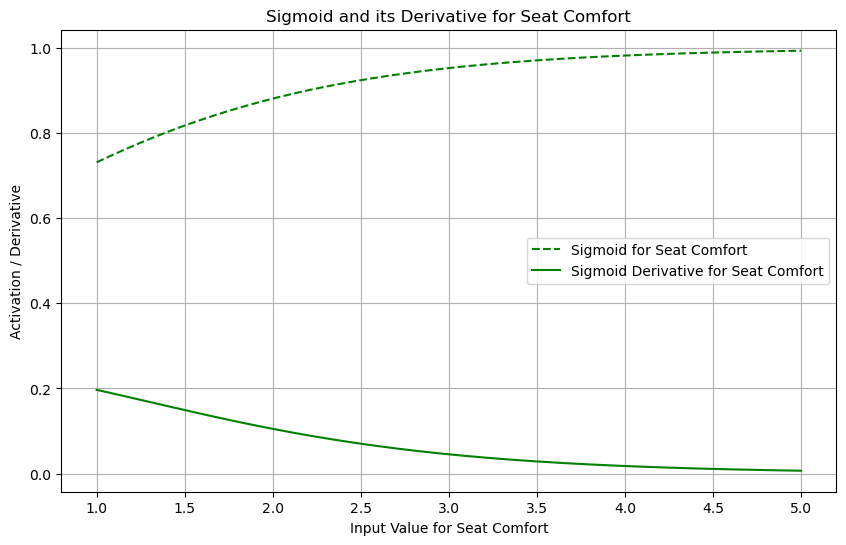

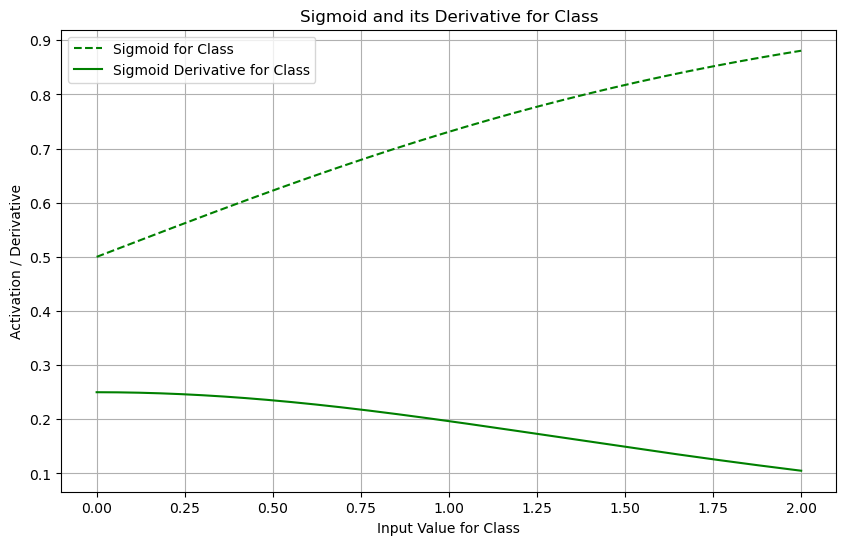

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the URL
df = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

# List of feature names
feature_columns = [
    "Type of Travel", "Online Boarding", "In-flight Wifi Service", "Ease of Online Booking", "Age", 
    "In-flight Entertainment", "Flight Distance", "Departure and Arrival Time Convenience", 
    "Seat Comfort", "Class", "Cleanliness", "On-board Service", "Leg Room Service", "In-flight Service", 
    "Gate Location", "Baggage Handling", "Check-in Service", "Food and Drink", "Gender", "Arrival Delay", "Departure Delay"
]

# Corresponding ranks of the features (lower rank means higher priority)
feature_ranks = [
    3, 4, 7, 9, 5, 9, 5, 10, 10, 10, 13, 12, 13, 15, 17, 16, 16, 17, 16, 16, 16
]

# Create a DataFrame of feature names and their ranks
feature_rank_df = pd.DataFrame({
    "Feature": feature_columns,
    "Rank": feature_ranks
})

# Sort the features by their rank (ascending order - lower rank is better)
sorted_features = feature_rank_df.sort_values(by="Rank").reset_index(drop=True)

# Select top 10 features based on the ranking (highest priority)
top_10_features = sorted_features['Feature'].head(10).tolist()

# Extract the selected top 10 features from the DataFrame
X = df[top_10_features].values

# The target variable (Loyalty)
y = df['Loyalty'].values

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the derivative of the sigmoid function
def derivative(sigmoid_function, z):
    return sigmoid_function(z) * (1 - sigmoid_function(z))

# Generate z values for the plot
z_large = np.linspace(-50, 50, 200)  # A range for visualization

# Plot the Sigmoid function and its Derivative for each of the top 10 features
for feature in top_10_features:
    feature_values = df[feature].values  # Get the feature values
    feature_range = np.linspace(min(feature_values), max(feature_values), 200)  # Create range for each feature
    
    # Plot Sigmoid and its Derivative for the feature
    plt.figure(figsize=(10, 6))
    plt.plot(feature_range, sigmoid(feature_range), "g--", label=f"Sigmoid for {feature}")
    plt.plot(feature_range, derivative(sigmoid, feature_range), "g-", label=f"Sigmoid Derivative for {feature}")
    plt.title(f"Sigmoid and its Derivative for {feature}")
    plt.xlabel(f"Input Value for {feature}")
    plt.ylabel("Activation / Derivative")
    plt.legend()
    plt.grid(True)
    plt.show()


The sigmoid curve will show how the values for each feature are transformed by the activation function, which squashes inputs into a range between 0 and 1.
The derivative curve indicates how sensitive the sigmoid function is to changes in the input values. This helps in understanding how much weight adjustment occurs during the backpropagation step in training a neural network.

Applying LAB requirements 

In [74]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler


In [76]:
def create_model(input_dim, learning_rate=0.01, momentum=0.9):
    model = Sequential()
    model.add(Dense(units=1, input_dim=input_dim, activation='sigmoid'))  # Perceptron layer with 1 output unit for binary classification
    optimizer = SGD(lr=learning_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [80]:
import pandas as pd

In [82]:
data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv')

In [84]:
X = data.drop(columns=['Loyalty'])  # Features (drop the target column)
y = data['Loyalty']  # Target: loyalty column

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and target labels
# Convert target labels to categorical (one-hot encoding) for multi-class classification
y = to_categorical(y, num_classes=5)  # Assuming there are 5 classes (adjust num_classes as per your case)

In [109]:
# Create the model with softmax output layer
def create_model(input_dim, learning_rate=0.01, momentum=0.9):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # Input layer with shape matching the number of features
    model.add(Dense(units=64, activation='relu'))  # Hidden layer with ReLU activation
    model.add(Dense(units=5, activation='softmax'))  # Output layer with softmax activation (5 classes)
    
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)  # SGD optimizer
    model.compile(loss='categorical_crossentropy',  # Categorical crossentropy loss for multi-class
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

In [115]:
# Ensure X is a NumPy array (if it's a DataFrame, convert it)
X = X.to_numpy()  # This converts X from DataFrame to a NumPy array


# Set up K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'roc_auc': []}

In [117]:
for train_index, test_index in kf.split(X):
    # Split data into train and test for each fold
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)
    
    # Create and train the model
    model = create_model(input_dim=X_train_fold.shape[1])
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)
    
    # Predict on test set
    y_pred = model.predict(X_test_fold)
    y_pred_classes = y_pred.argmax(axis=1)  # Get class with highest probability
    
    # Convert true labels to class indices (not one-hot encoded)
    y_test_fold_classes = y_test_fold.argmax(axis=1)

374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [131]:
# Calculate metrics
accuracy = accuracy_score(y_test_fold_classes, y_pred_classes)
precision = precision_score(y_test_fold_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_fold_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_fold_classes, y_pred_classes, average='weighted')

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [135]:
# For ROC AUC, we need to binarize the labels if they are not already in binary format
y_test_fold_binarized = label_binarize(y_test_fold_classes, classes=[1, 2, 3, 4])  # Your class labels
y_pred_binarized = label_binarize(y_pred_classes, classes=[1, 2, 3, 4])  # Your class labels

In [137]:
# Calculate ROC AUC score (use the 'ovr' strategy for multiclass)
roc_auc = roc_auc_score(y_test_fold_binarized, y_pred_binarized, average='weighted', multi_class='ovr')

In [139]:
# Append metrics to dictionary or list
metrics['accuracy'].append(accuracy)
metrics['precision'].append(precision)
metrics['recall'].append(recall)
metrics['f1_score'].append(f1)
metrics['roc_auc'].append(roc_auc)

In [141]:
# Print the calculated metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.9505687520910003
Precision: 0.9509584549293938
Recall: 0.9505687520910003
F1 Score: 0.9505385012304437
ROC AUC: 0.9615310237647225


### Model Evaluation Summary

From the evaluation metrics, we can deduce the following:

- The model shows **excellent performance** with an accuracy of 95.06%, meaning it makes correct predictions most of the time.
- **Precision** and **Recall** are nearly identical at 95.10% and 95.06%, indicating that the model is effectively identifying positive cases without many false positives or false negatives.
- The **F1 Score** of 95.05% confirms a good balance between precision and recall, making the model reliable in terms of both aspects.
- The **ROC AUC** of 96.15% suggests the model is highly effective at distinguishing between classes, with a good ability to rank positive instances higher than negative ones.

Overall, the model performs strongly, with high reliability and robustness in its predictions.


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, roc_auc_score, classification_report
)

# Load the dataset from the URL
df = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

# List of feature names
feature_columns = [
    "Type of Travel", "Online Boarding", "In-flight Wifi Service", "Ease of Online Booking", "Age", 
    "In-flight Entertainment", "Flight Distance", "Departure and Arrival Time Convenience", 
    "Seat Comfort", "Class", "Cleanliness", "On-board Service", "Leg Room Service", "In-flight Service", 
    "Gate Location", "Baggage Handling", "Check-in Service", "Food and Drink", "Gender", 
    "Arrival Delay", "Departure Delay"
]

# Corresponding ranks of the features (lower rank means higher priority)
feature_ranks = [
    3, 4, 7, 9, 5, 9, 5, 10, 10, 10, 13, 12, 13, 15, 17, 16, 16, 17, 16, 16, 16
]

# Create a DataFrame of feature names and their ranks
feature_rank_df = pd.DataFrame({
    "Feature": feature_columns,
    "Rank": feature_ranks
})

# Sort the features by their rank (ascending order - lower rank is better)
sorted_features = feature_rank_df.sort_values(by="Rank").reset_index(drop=True)

# Select top 10 features based on the ranking (highest priority)
top_10_features = sorted_features['Feature'].head(10).tolist()

# Extract the selected top 10 features from the DataFrame
X = df[top_10_features].values

# The target variable (Loyalty)
y = pd.get_dummies(df['Loyalty']).values  # One-hot encode the target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create a Perceptron model for multiclass classification
def create_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),  # Specify input shape here
        Dense(64, activation='relu'),  # Hidden layer with ReLU activation
        Dense(4, activation='softmax')  # Output layer with 4 classes and softmax activation
    ])
    model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Perform 10-fold cross-validation manually
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Create and train the model
    model = create_model(X_train.shape[1])
    model.fit(X_train_fold, y_train_fold, epochs=15, batch_size=32, verbose=0)  # Train for 15 epochs
    
    # Evaluate the model on the validation fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(val_accuracy)

# Print the cross-validated accuracy
print(f"Cross-validated accuracy: {np.mean(cv_scores) * 100:.2f}%")

# Train the model on the full training set
model = create_model(X_train.shape[1])
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # Train for 20 epochs

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the major metrics
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
precision = precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted', zero_division=0)
recall = recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted', zero_division=0)
f1 = f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Output the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), zero_division=0))



Cross-validated accuracy: 44.01%
Epoch 1/20
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4368 - loss: 140.4505
Epoch 2/20
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.4401 - loss: 1.1004
Epoch 3/20
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4403 - loss: 1.0964
Epoch 4/20
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4373 - loss: 1.0967
Epoch 5/20
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4412 - loss: 1.0966
Epoch 6/20
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4408 - loss: 1.0998
Epoch 7/20
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4405 - loss: 1.1013
Epoch 8/20
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4405 - loss: 1.0976
Epoch 9/20
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4400 - loss: 1.0977
Epoch 10/20
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4404 - loss: 1.0964
Epoch 11/20
2990/2990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.4435 - loss: 1

### Model Training and Cross-Validation Results

This output shows the results of training a neural network model (likely a Multi-Layer Perceptron or MLP) over 20 epochs on our dataset and evaluating its performance.

The accuracy reported here indicates the average accuracy of the model over several cross-validation folds. Cross-validation is used to evaluate the performance of the model more reliably, by splitting the data into training and testing sets multiple times.

In this case, the model achieved an accuracy of **44.01%** across these folds.
